#Introducción

Este notebook está creado pensando cómo presentar los descubrimientos de fallas de pago que están teniendo los estudiantes con **Stripe**.

# Uso de datos **pagos no exitosos** desde Stripe

El dataset con el que se está trabajando es un reporte extraído directamente de Stripe.  El corte está hecho desde principios de operación de Stripe y se está utilizando todo el universo de "cargos" (ch_id).

Nota: El freporte fue extraído y exportado como csv directamente de Stripe.

In [1]:
import json
import numpy as np
import pandas as pd

## Fase 1: Inspección





Abrimos la base de datos de Stripe-2023.csv
Procedemos a revisar las columnas.

In [2]:
df_stripe = pd.read_csv("/content/file_stripe-errors-all-20230814.csv")
# agregar customer para incluirlos en el análisis
dataframe = df_stripe[['id','marca','product','created_at','processed_at','current_total_price','line_items','tipo_tarjeta','card_company','charge_id','error_code_bank','error_decline_code','error_message','error_type','error_param']]
dataframe.shape

<ipython-input-2-6c9c903df230>:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_stripe = pd.read_csv("/content/file_stripe-errors-all-20230814.csv")


(59526, 15)

## Fase 2: Limpieza

Vamos a convertir los tipos de datos de cada columna para asegurar las operaciones que haremos más adelante.

In [3]:
convert_dictionary= {
    'id':str,
    'marca':str,
    'product':str,
    'created_at':str,
    'processed_at':str,
#   'customer':str,
    'current_total_price':float,
    'line_items':str,
    'tipo_tarjeta':str,
    'card_company':str,
    'charge_id':str,
    'error_code_bank':str,
    'error_decline_code':str,
    'error_message':str,
    'error_type':str,
    'error_param':str
}
df_converted = dataframe.astype(convert_dictionary)
df_converted.dtypes

id                      object
marca                   object
product                 object
created_at              object
processed_at            object
current_total_price    float64
line_items              object
tipo_tarjeta            object
card_company            object
charge_id               object
error_code_bank         object
error_decline_code      object
error_message           object
error_type              object
error_param             object
dtype: object

Veamos cómo se comporta **describe()** ya con los datos más limpios.

¿Qué conclusiones puedes sacar con este resumen?

In [4]:
df_converted.describe()

current_total_price
count         59526.000000
mean           3469.940718
std            3553.774183
min              10.000000
25%            2000.000000
50%            2387.000000
75%            3256.000000
max           55000.000000

Para encontrar los 'n' valores más bajos o altos dentro de una propiedad podemos utilizar la siguiente forma:

In [5]:
df_converted['current_total_price'].sort_values(ascending=True).head(100)

11055    10.0
39671    10.0
4234     10.0
4237     10.0
39152    10.0
         ... 
37799    79.0
34746    79.0
59483    79.0
37426    79.5
1504     80.0
Name: current_total_price, Length: 100, dtype: float64

In [6]:
df_converted['current_total_price'].sort_values(ascending=True).tail(100)

10061    24960.0
10062    24960.0
9986     24960.0
10089    24960.0
9761     24960.0
          ...   
16499    26565.0
16503    26565.0
16504    26565.0
132      46305.0
35878    55000.0
Name: current_total_price, Length: 100, dtype: float64

Lo siguiente que haremos será convertir en categorías las propiedades para trabajar sobre categorías más adelante.  Además crearemos una propiedad "year" la modificaremos para que contenga solo año.

In [7]:
df_converted["marca"] = df_converted["marca"].astype('category')
df_converted["product"] = df_converted["product"].astype('category')
df_converted["line_items"] = df_converted["line_items"].astype('category')
df_converted["tipo_tarjeta"] = df_converted["tipo_tarjeta"].astype('category')
df_converted["card_company"] = df_converted["card_company"].astype('category')
df_converted["error_code_bank"] = df_converted["error_code_bank"].astype('category')
df_converted["error_decline_code"] = df_converted["error_decline_code"].astype('category')
df_converted["error_message"] = df_converted["error_message"].astype('category')
df_converted["error_type"] = df_converted["error_type"].astype('category')
df_converted["error_param"] = df_converted["error_param"].astype('category')
df_converted["charge_id"] = df_converted["charge_id"].astype('category')
#df_converted["customer"] = df_converted["customer"].astype('category')

df_converted["year_c"] = df_converted["created_at"].map(lambda x: str(x)[0:4])
df_converted["year_c"] = df_converted["year_c"].astype('category')
df_converted["year_p"] = df_converted["processed_at"].map(lambda x: str(x)[0:4])
df_converted["year_p"] = df_converted["year_c"].astype('category')

Una vez que tenemos los dataframes limpios, podemos filtrar los datos de los meteoritos, por ejemplo, solo aquellos que tienen una masa mayor a 200,000.

In [8]:
df_large = df_converted[df_converted['current_total_price'] > 11]
df_large.shape

(59506, 17)

In [9]:
print("Max. Payment intent: " + str(df_large['current_total_price'].max())
  + ", Min. Payment intent: " + str(df_large['current_total_price'].min()))

Max. Payment intent: 55000.0, Min. Payment intent: 14.13


In [10]:
df_large.describe(include='all')

id  marca                      product  \
count                         59506  59506                        59506   
unique                        59506      3                          114   
top     pi_3Nf47BFZhL31auBH1Vf6oeez    ula  COLEGIATURA LICENCIATURA WA   
freq                              1  55716                        33054   
mean                            NaN    NaN                          NaN   
std                             NaN    NaN                          NaN   
min                             NaN    NaN                          NaN   
25%                             NaN    NaN                          NaN   
50%                             NaN    NaN                          NaN   
75%                             NaN    NaN                          NaN   
max                             NaN    NaN                          NaN   

                       created_at               processed_at  \
count                       59506                      59506   
unique                      59101                      59101   
top     2023-01-25T17:46:44-06:00  2023-01-25T17:46:44-06:00   
freq                            3                          3   
mean                          NaN                        NaN   
std                           NaN                        NaN   
min                           NaN                        NaN   
25%                           NaN                        NaN   
50%                           NaN                        NaN   
75%                           NaN                        NaN   
max                           NaN                        NaN   

        current_total_price  \
count          59506.000000   
unique                  NaN   
top                     NaN   
freq                    NaN   
mean            3471.103590   
std             3553.805131   
min               14.130000   
25%             2000.000000   
50%             2387.000000   
75%             3256.000000   
max            55000.000000   

                                               line_items tipo_tarjeta  \
count                                               59506        59506   
unique                                                 28            5   
top     The bank returned the decline code `do_not_hon...        debit   
freq                                                38016        34377   
mean                                                  NaN          NaN   
std                                                   NaN          NaN   
min                                                   NaN          NaN   
25%                                                   NaN          NaN   
50%                                                   NaN          NaN   
75%                                                   NaN          NaN   
max                                                   NaN          NaN   

       card_company charge_id error_code_bank error_decline_code  \
count         59506     59506           59506              59506   
unique            4     58984               9                 21   
top            visa       nan   card_declined       do_not_honor   
freq          47512       523           56380              38020   
mean            NaN       NaN             NaN                NaN   
std             NaN       NaN             NaN                NaN   
min             NaN       NaN             NaN                NaN   
25%             NaN       NaN             NaN                NaN   
50%             NaN       NaN             NaN                NaN   
75%             NaN       NaN             NaN                NaN   
max             NaN       NaN             NaN                NaN   

                  error_message  error_type error_param year_c year_p  
count                     59506       59506       59506  59506  59506  
unique                       20           2           4      2      2  
top     Your card was declined.  card_error         nan   2023   202

In [11]:
df_large

id marca      product  \
0      pi_3Nf47BFZhL31auBH1Vf6oeez  bedu          nan   
1      pi_3NaoNuFZhL31auBH1Wp0ZUTG  bedu          nan   
2      pi_3NYBwDFZhL31auBH1jIukotu  bedu          nan   
3      pi_3NQ1ovFZhL31auBH1KJRATiX  bedu          nan   
4      pi_3NPzLzFZhL31auBH0xC7hhUp  bedu          nan   
...                            ...   ...          ...   
59521  pi_3NUCkeF5JHugNzfe0J3RJfX2   utc  COLEGIATURA   
59522  pi_3NUCGwF5JHugNzfe0tQdB6Up   utc      DIA UTC   
59523  pi_3NUBc1F5JHugNzfe1kQzY1GZ   utc      DIA UTC   
59524  pi_3NUBX1F5JHugNzfe0wYDjDKs   utc      DIA UTC   
59525  pi_3NUBWCF5JHugNzfe0hxTuAIo   utc      DIA UTC   

                      created_at               processed_at  \
0      2023-08-14T10:59:37-06:00  2023-08-14T10:59:37-06:00   
1      2023-08-02T17:23:18-06:00  2023-08-02T17:23:18-06:00   
2      2023-07-26T11:55:53-06:00  2023-07-26T11:55:53-06:00   
3      2023-07-03T23:30:37-06:00  2023-07-03T23:30:37-06:00   
4      2023-07-03T20:52:35-06:00  2023-07-03T20:52:35-06:00   
...                          ...                        ...   
59521  2023-07-15T11:59:28-06:00  2023-07-15T11:59:28-06:00   
59522  2023-07-15T11:28:46-06:00  2023-07-15T11:28:46-06:00   
59523  2023-07-15T10:46:29-06:00  2023-07-15T10:46:29-06:00   
59524  2023-07-15T10:41:19-06:00  2023-07-15T10:41:19-06:00   
59525  2023-07-15T10:40:28-06:00  2023-07-15T10:40:28-06:00   

       current_total_price                                         line_items  \
0                   9000.0                                                nan   
1                    150.0                                                nan   
2                     50.0                                                nan   
3                    150.0                                                nan   
4                    150.0                                                nan   
...                    ...                                                ...   
59521               1690.0  The bank returned the decline code `insufficie...   
59522                600.0  The bank returned the decline code `do_not_hon...   
59523                600.0  The bank returned the decline code `do_not_hon...   
59524                600.0  The bank returned the decline code `do_not_hon...   
59525                600.0  The bank returned the decline code `do_not_hon...   

      tipo_tarjeta card_company                    charge_id  \
0              nan          nan  ch_3Nf47BFZhL31auBH18ayRsvj   
1              nan          nan                          nan   
2              nan          nan                          nan   
3              nan          nan                          nan   
4              nan          nan                          nan   
...            ...          ...                          ...   
59521       credit   mastercard  ch_3NUCkeF5JHugNzfe02rTyYz1   
59522        debit         visa  ch_3NUCGwF5JHugNzfe0E38FCkg   
59523        debit         visa  ch_3NUBc1F5JHugNzfe13zpBdXr   
59524        debit         visa  ch_3NUBX1F5JHugNzfe0QQjf97W   
59525        debit         visa  ch_3NUBWCF5JHugNzfe0A9uHoqm   

                             error_code_bank  error_decline_code  \
0                              card_declined  insufficient_funds   
1      payment_intent_payment_attempt_failed                 nan   
2      payment_intent_payment_attempt_failed                 nan   
3      payment_intent_payment_attempt_failed                 nan   
4      payment_intent_payment_attempt_failed                 nan   
...                                      ...                 ...   
59521                          card_declined  insufficient_funds   
59522                          card_declined        do_not_honor   
59523                          card_declined        do_not_honor   
59524                          card_declined        do_not_honor   
59525                          card_declined        do_not_honor   

                               

## Fase 3: Exploración de los datos **limpios**

Vamos a explorar gráficamente los datos que ya tenemos limpios.
Lo primero que haremos será ver por clasificación (y aquí le sacamos jugo a las categorías) cómo se distribuyen los errores.

Como buena práctica siempre pon títulos a tus gráficas y ejes, no todos los que las vean tendrán el contexto a primera mano y esto les ayudará a entender más rápido lo que pueden ver.

Adicionalemente, vamos a ponerle un poco de estilo a las líneas y fonts en nuestras gráficas.

Para más detalles sobre colores, visita:

https://matplotlib.org/3.1.0/gallery/color/named_colors.html

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings
warnings.simplefilter("ignore")

Vamos a representar los puntos por el valor de "current_total_price".

Vamos a normalizar "current_total_price" para poder apreciar en la gráfica los tamaños relativos.

Una vez normalizados los datos algunos puntos pueden desaparecer.  Para poder representarlos vamos a ponerles un valor "artificial" y denotarlos con otro color.

In [13]:
df_large["norm_price"] = ((df_large['current_total_price'] - df_large['current_total_price'].min()) /
                         (df_large['current_total_price'].max() - df_large['current_total_price'].min()))*15000
df_large["on_scale"] = np.where(df_large['marca'] == 'ula', 'royalblue', 'red')
df_large.loc[df_large["marca"] == "bedu", "on_scale"] = 'black'
df_large.loc[df_large["norm_price"] == 'utc', 'norm_price'] = (df_large['norm_price'].sort_values(ascending=True).unique())[1]

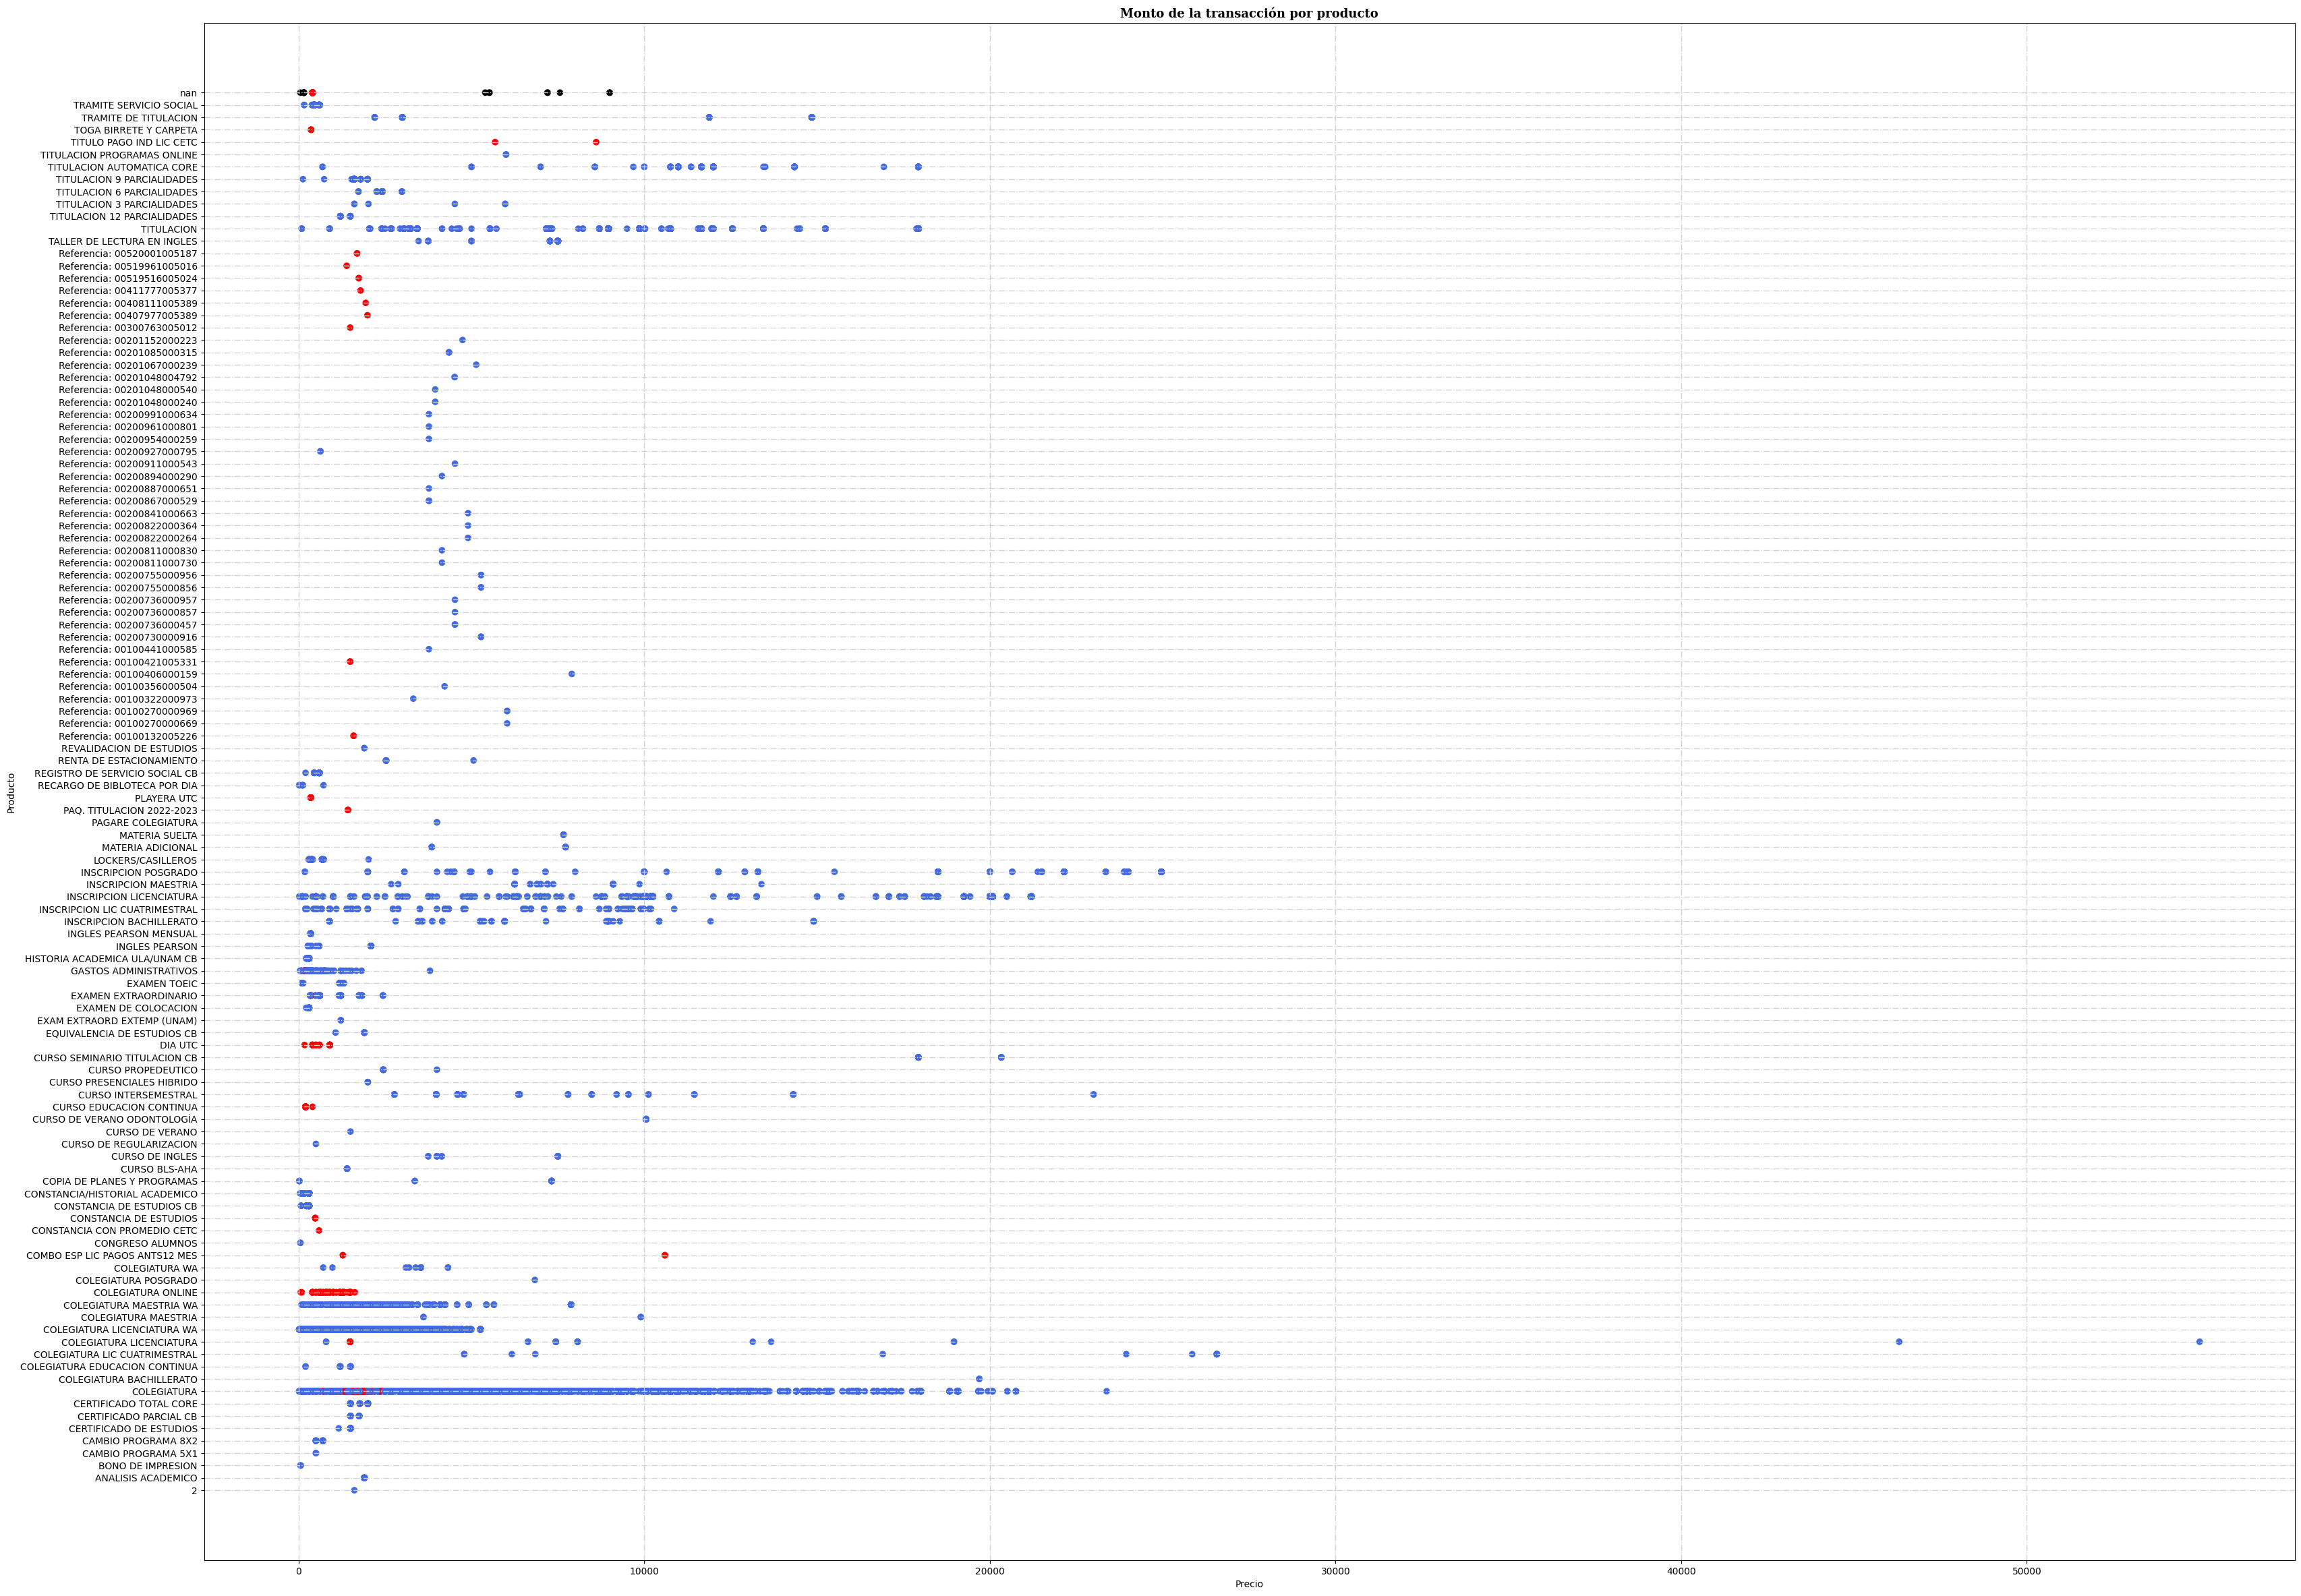

In [14]:
df_large = df_large.sort_values('product', ascending=True)

plt.rcParams['figure.figsize'] = [40, 60]
plt.grid(True, color='lightgray', linestyle='-.', linewidth=1)
plt.gca().patch.set_facecolor('1')

font_title = {'family': 'serif',
              'color':  'black',
              'weight': 'bold',
              'size': 13,
             }

plt.scatter(df_large['current_total_price'], df_large['product'], c=df_large['on_scale'])
plt.title('Monto de la transacción por producto', fontdict=font_title)
plt.xlabel('Precio')
plt.ylabel('Producto')
plt.subplots_adjust(bottom=0.5)
plt.show()

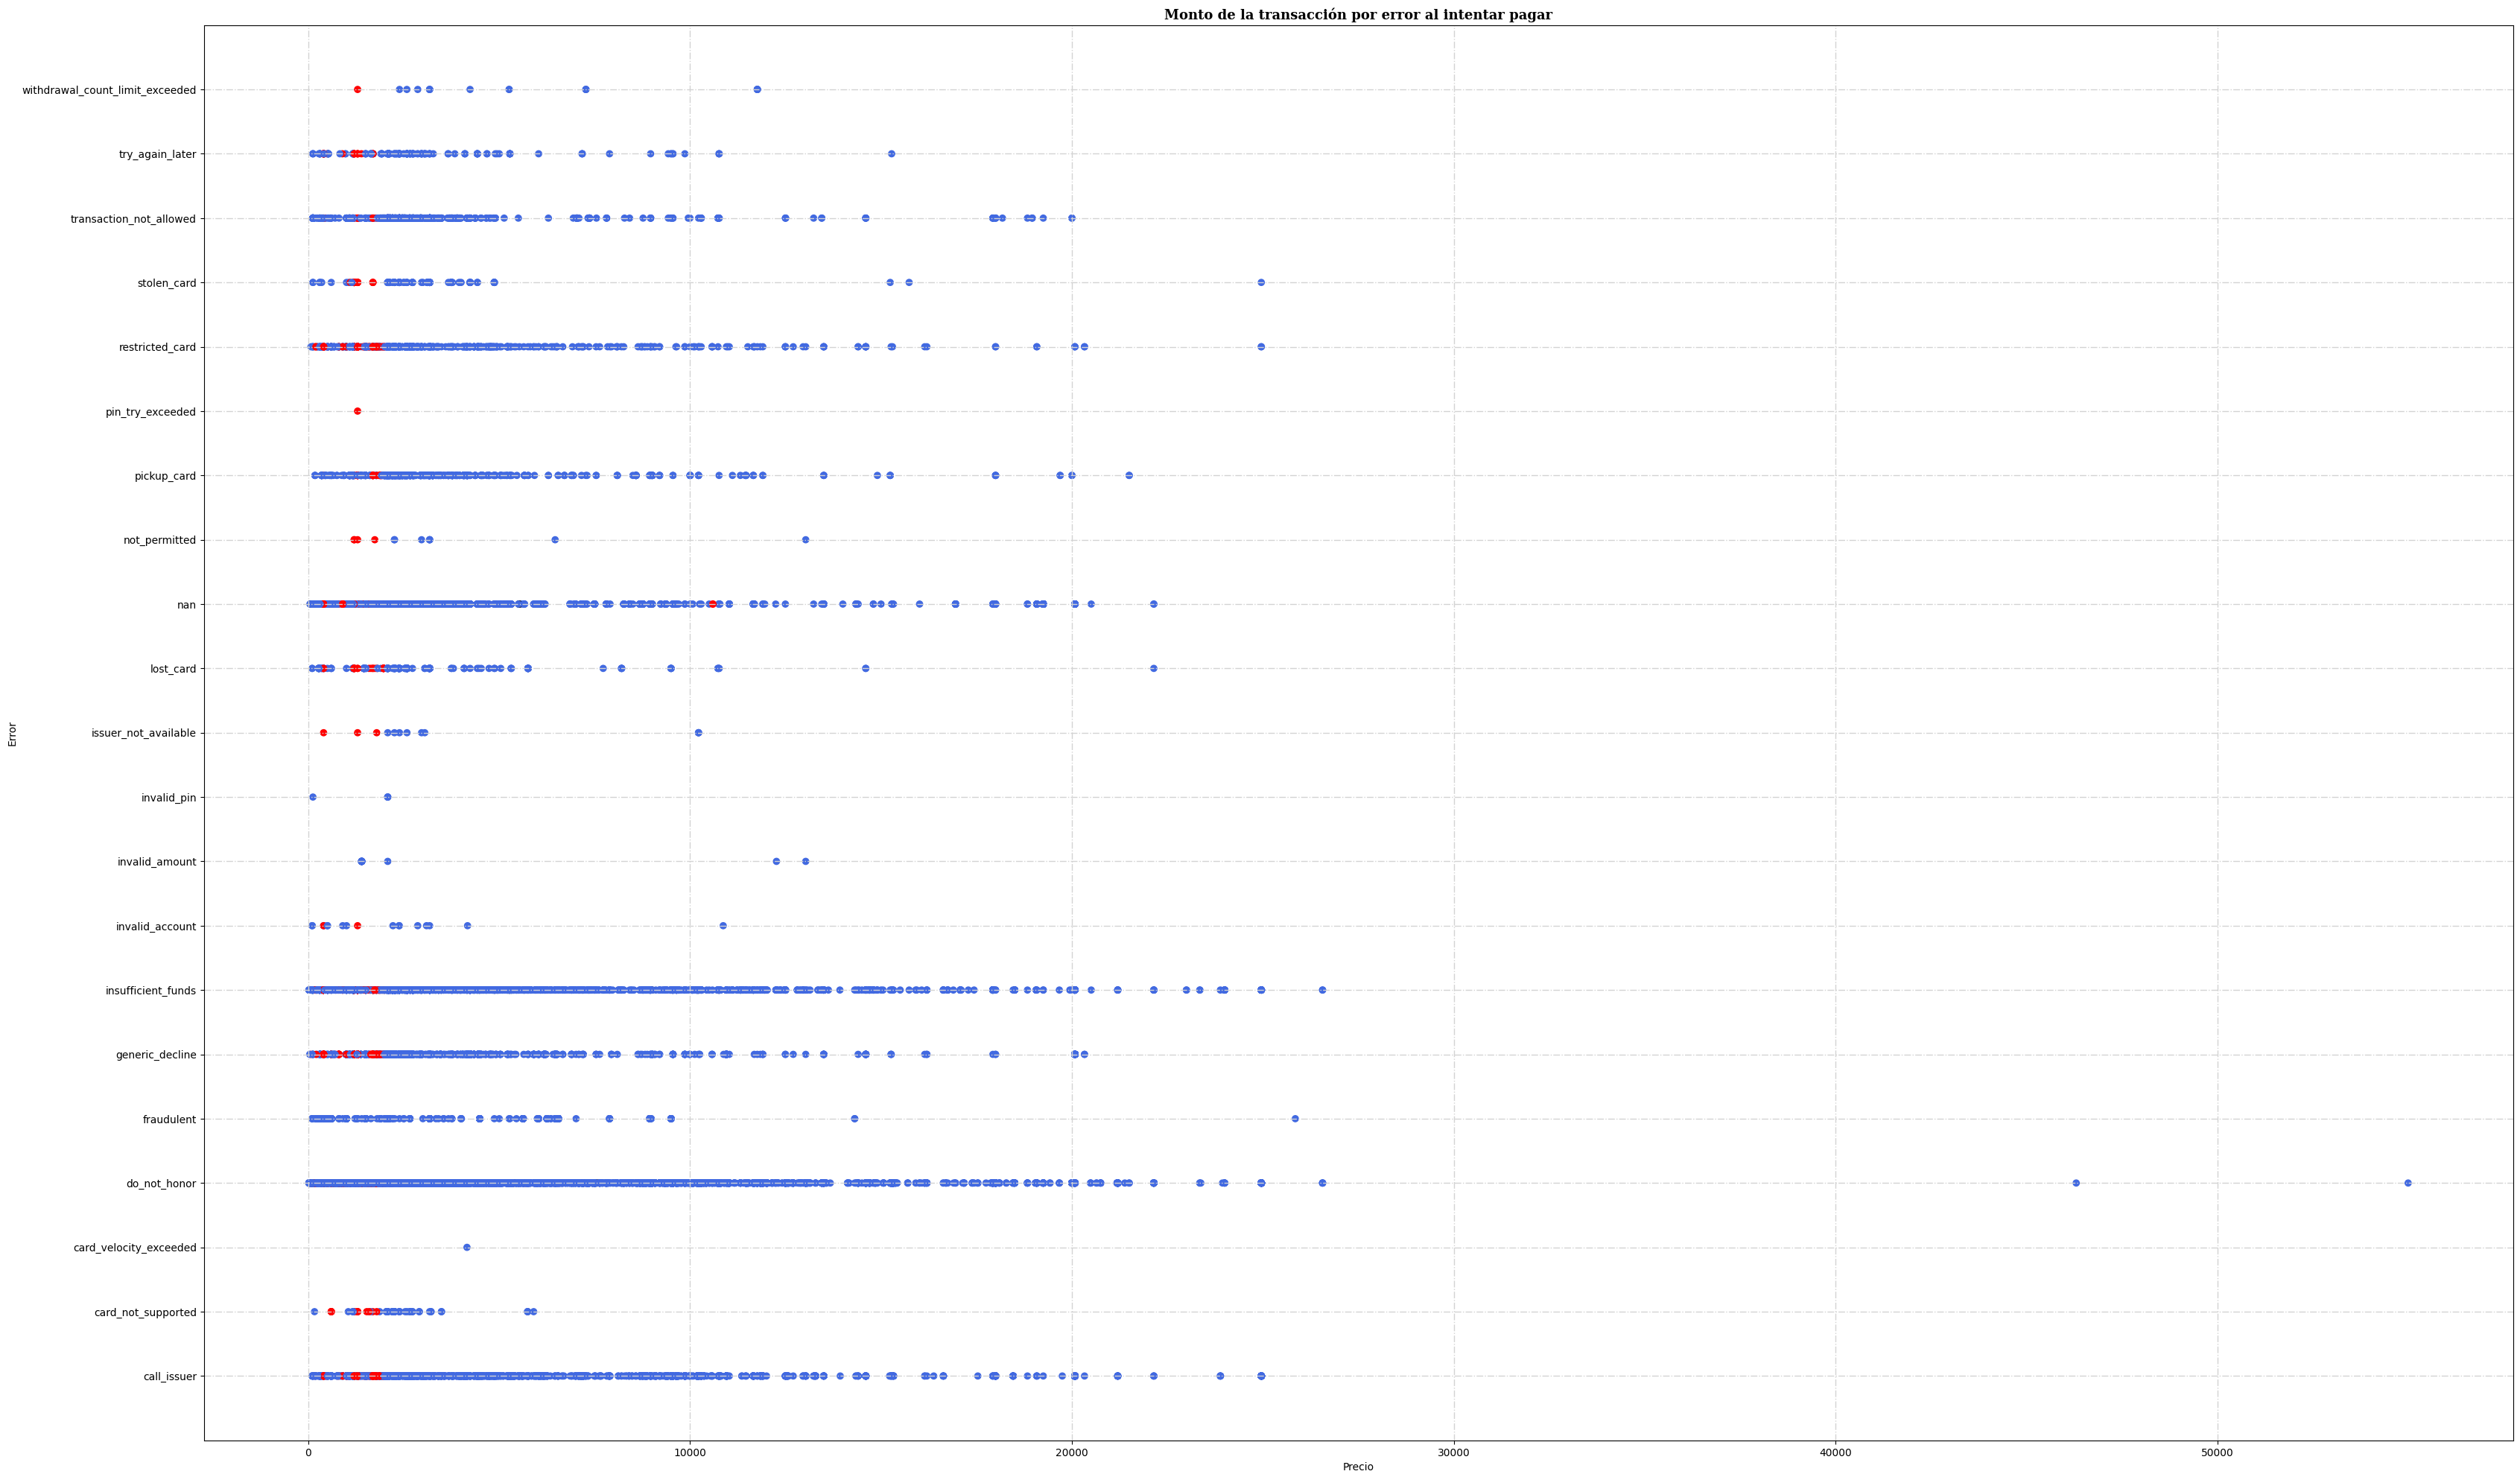

In [15]:
df_large = df_large.sort_values('error_decline_code', ascending=True)

plt.rcParams['figure.figsize'] = [40, 50]
plt.grid(True, color='lightgray', linestyle='-.', linewidth=1)
plt.gca().patch.set_facecolor('1')

font_title = {'family': 'serif',
              'color':  'black',
              'weight': 'bold',
              'size': 13,
             }

plt.scatter(df_large['current_total_price'], df_large['error_decline_code'], c=df_large['on_scale'])
plt.title('Monto de la transacción por error al intentar pagar', fontdict=font_title)
plt.xlabel('Precio')
plt.ylabel('Error')
plt.subplots_adjust(bottom=0.5)
plt.show()

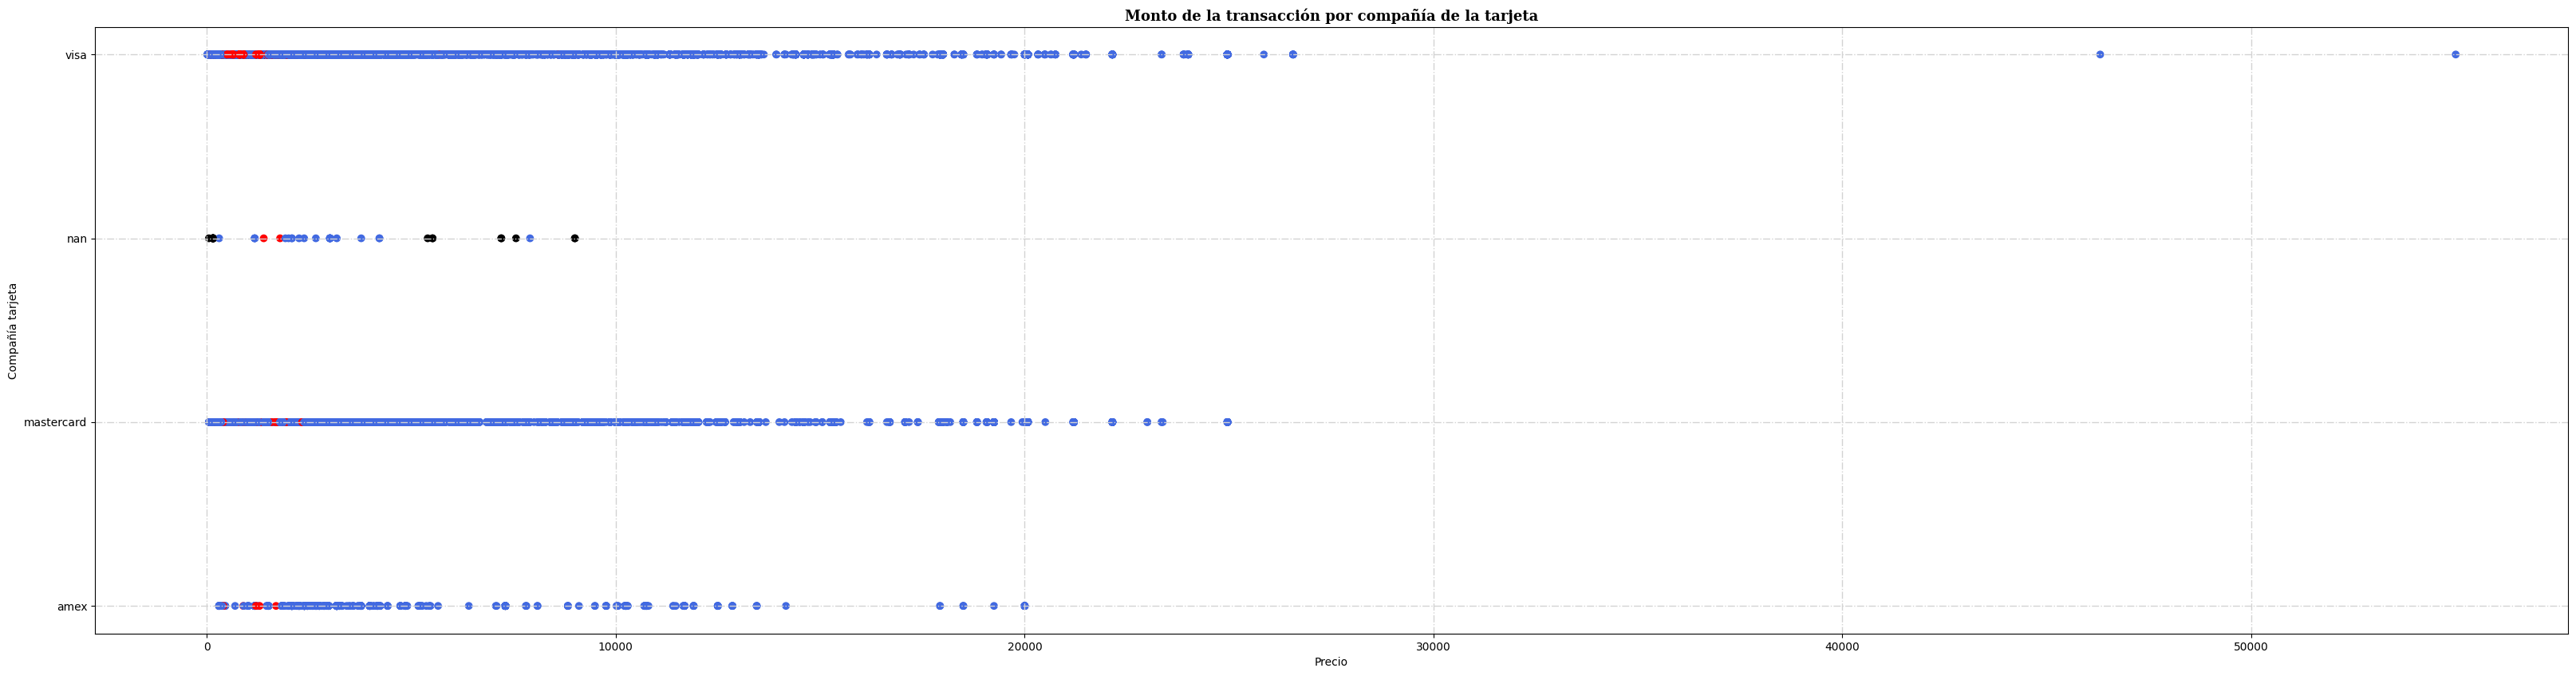

In [16]:
df_large = df_large.sort_values('card_company', ascending=True)

plt.rcParams['figure.figsize'] = [40, 20]
plt.grid(True, color='lightgray', linestyle='-.', linewidth=1)
plt.gca().patch.set_facecolor('1')

font_title = {'family': 'serif',
              'color':  'black',
              'weight': 'bold',
              'size': 13,
             }

plt.scatter(df_large['current_total_price'], df_large['card_company'], c=df_large['on_scale'])
plt.title('Monto de la transacción por compañía de la tarjeta', fontdict=font_title)
plt.xlabel('Precio')
plt.ylabel('Compañía tarjeta')
plt.subplots_adjust(bottom=0.5)
plt.show()

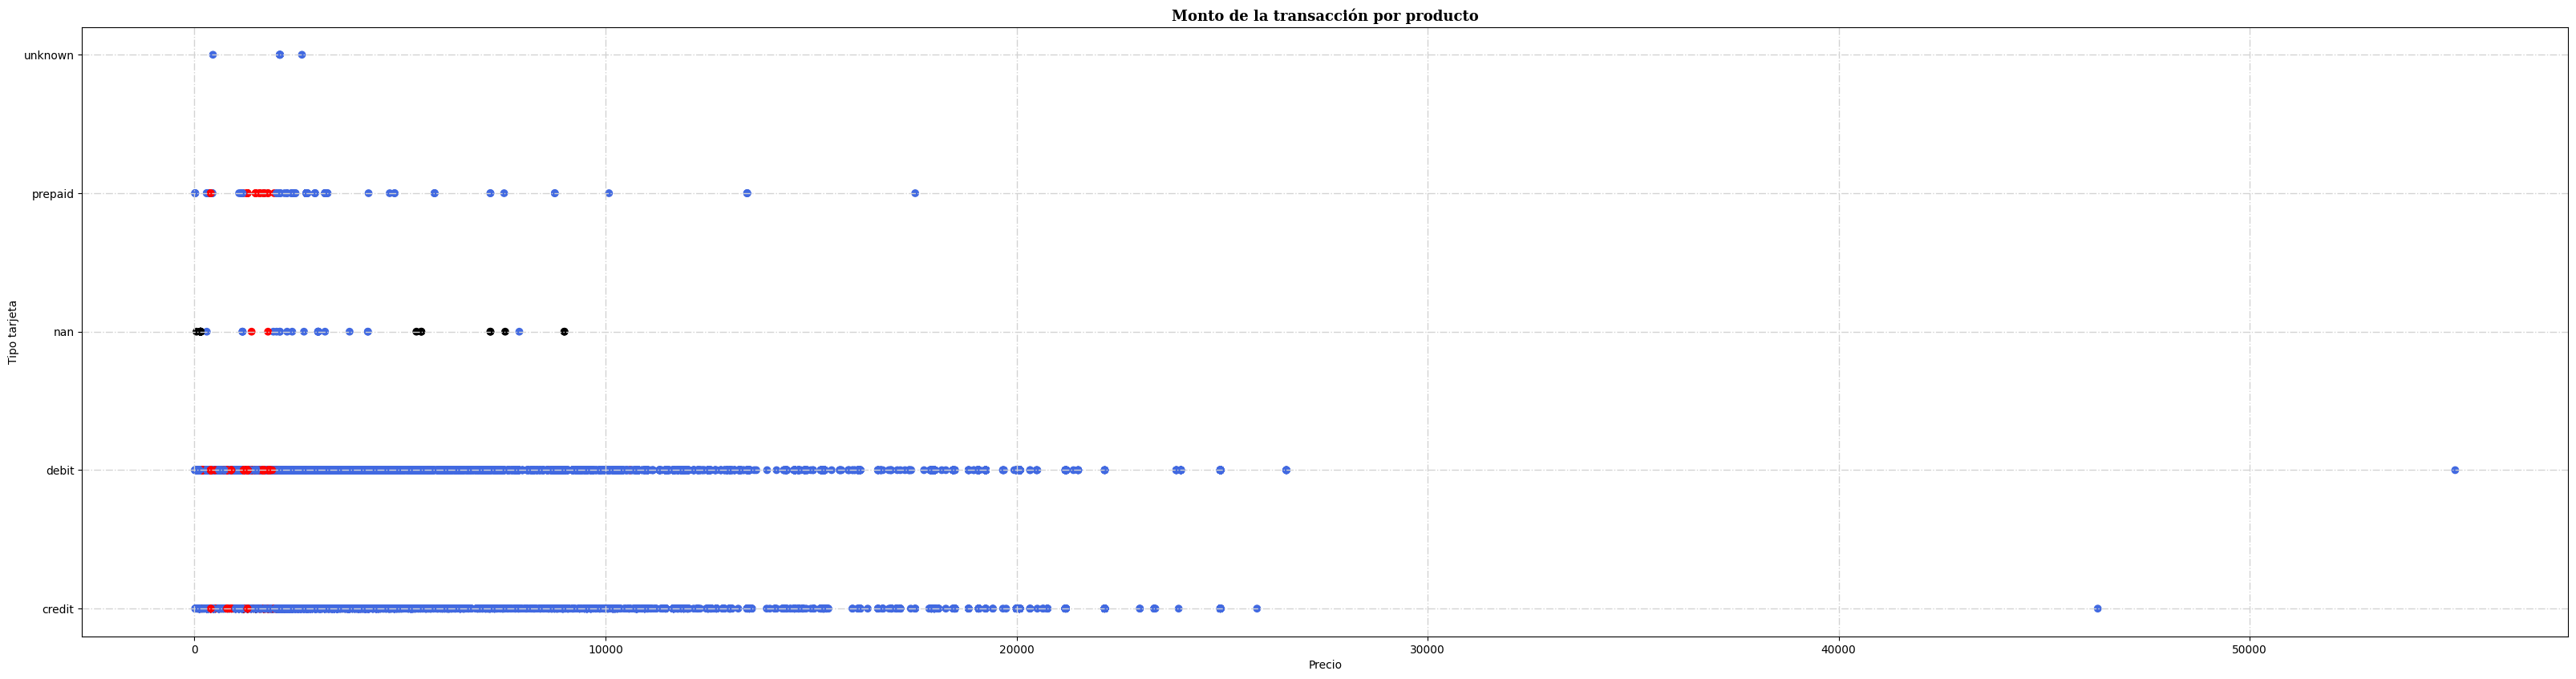

In [17]:
df_large = df_large.sort_values('tipo_tarjeta', ascending=True)

plt.rcParams['figure.figsize'] = [40, 20]
plt.grid(True, color='lightgray', linestyle='-.', linewidth=1)
plt.gca().patch.set_facecolor('1')

font_title = {'family': 'serif',
              'color':  'black',
              'weight': 'bold',
              'size': 13,
             }

plt.scatter(df_large['current_total_price'], df_large['tipo_tarjeta'], c=df_large['on_scale'])
plt.title('Monto de la transacción por producto', fontdict=font_title)
plt.xlabel('Precio')
plt.ylabel('Tipo tarjeta')
plt.subplots_adjust(bottom=0.5)
plt.show()

Revisemos como luce la distribución sin normalizar

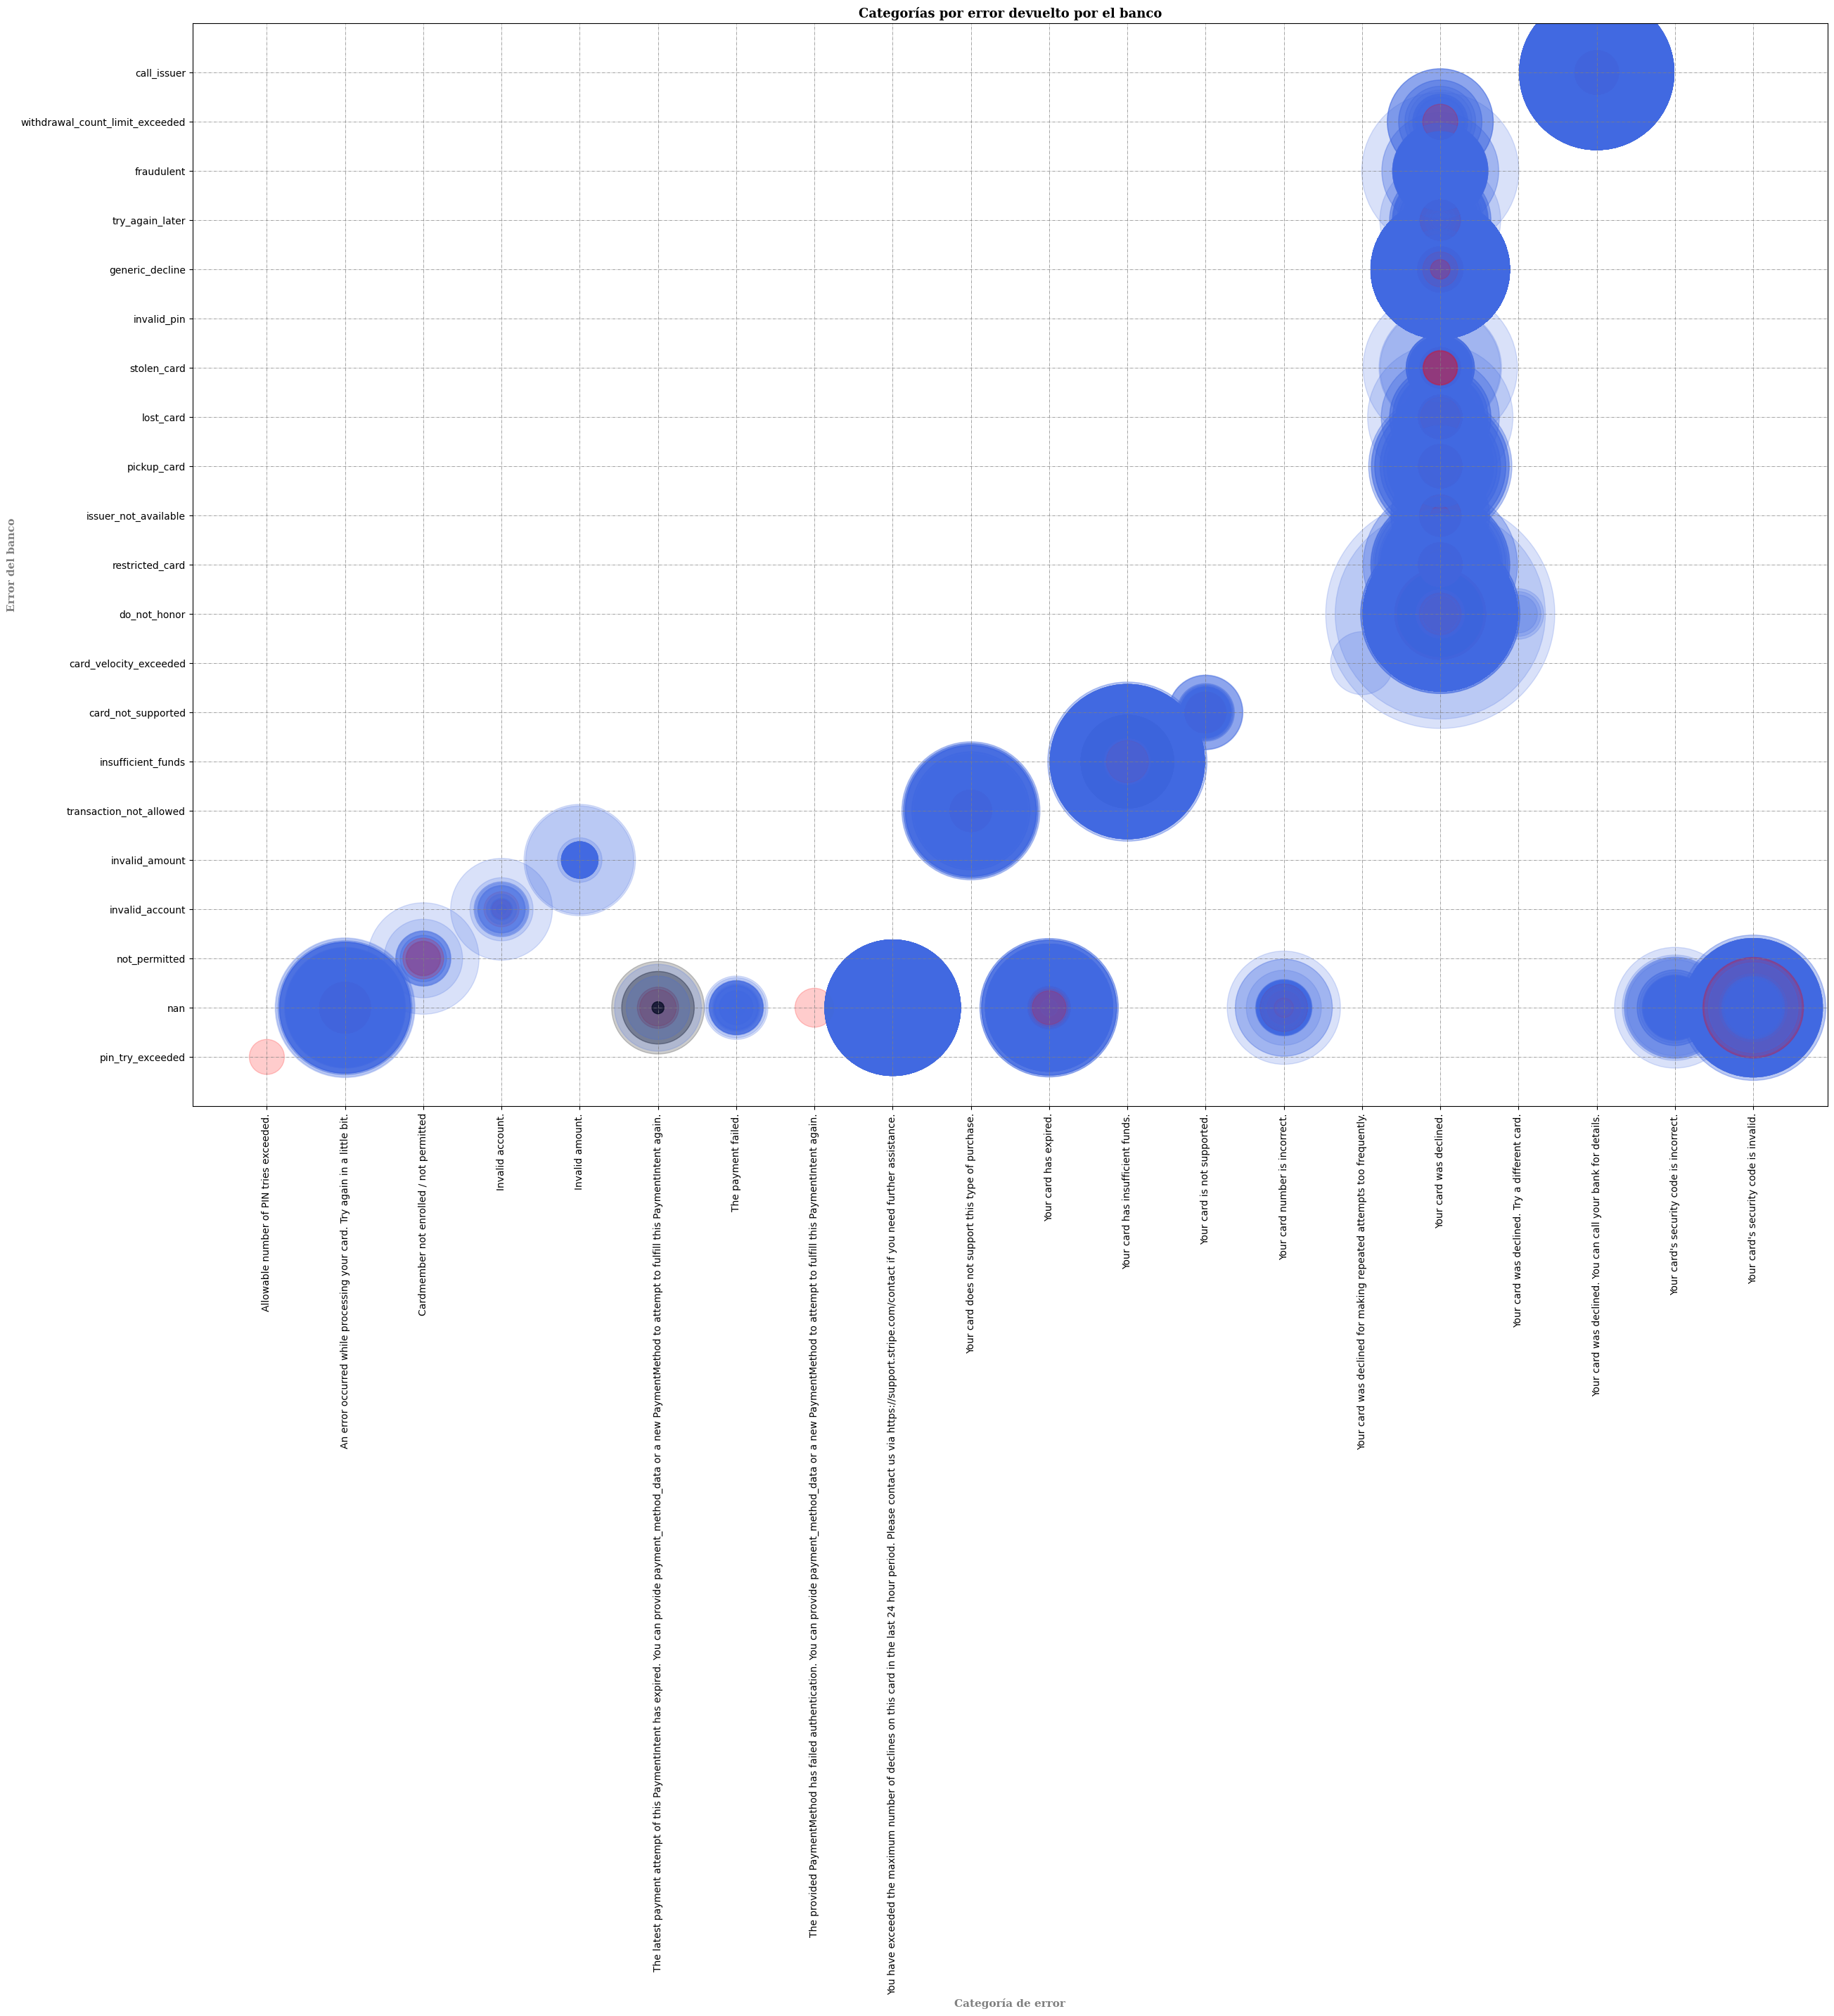

In [18]:
alpha_val = 0.2
df_large = df_large.sort_values('error_message', ascending=True)

plt.rcParams['figure.figsize'] = [30, 20]
plt.grid(True, color='gray', linestyle='-.', linewidth=0.5)
plt.gca().patch.set_facecolor('1')

font_t = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 13,
        }
font_st = {'family': 'serif',
        'color':  'gray',
        'weight': 'bold',
        'size': 11,
        }

plt.scatter(df_large['error_message'], df_large['error_decline_code'], c=df_large['on_scale'], s=df_large['current_total_price'], alpha=alpha_val)
plt.title('Categorías por error devuelto por el banco', fontdict=font_t)
plt.xlabel('Categoría de error', fontdict=font_st)
plt.ylabel('Error del banco', fontdict=font_st)
plt.xticks(rotation = 90)
plt.show()

Veamos cómo lucen ahora los puntos normalizados y aprovechemos para ponerles nombre.

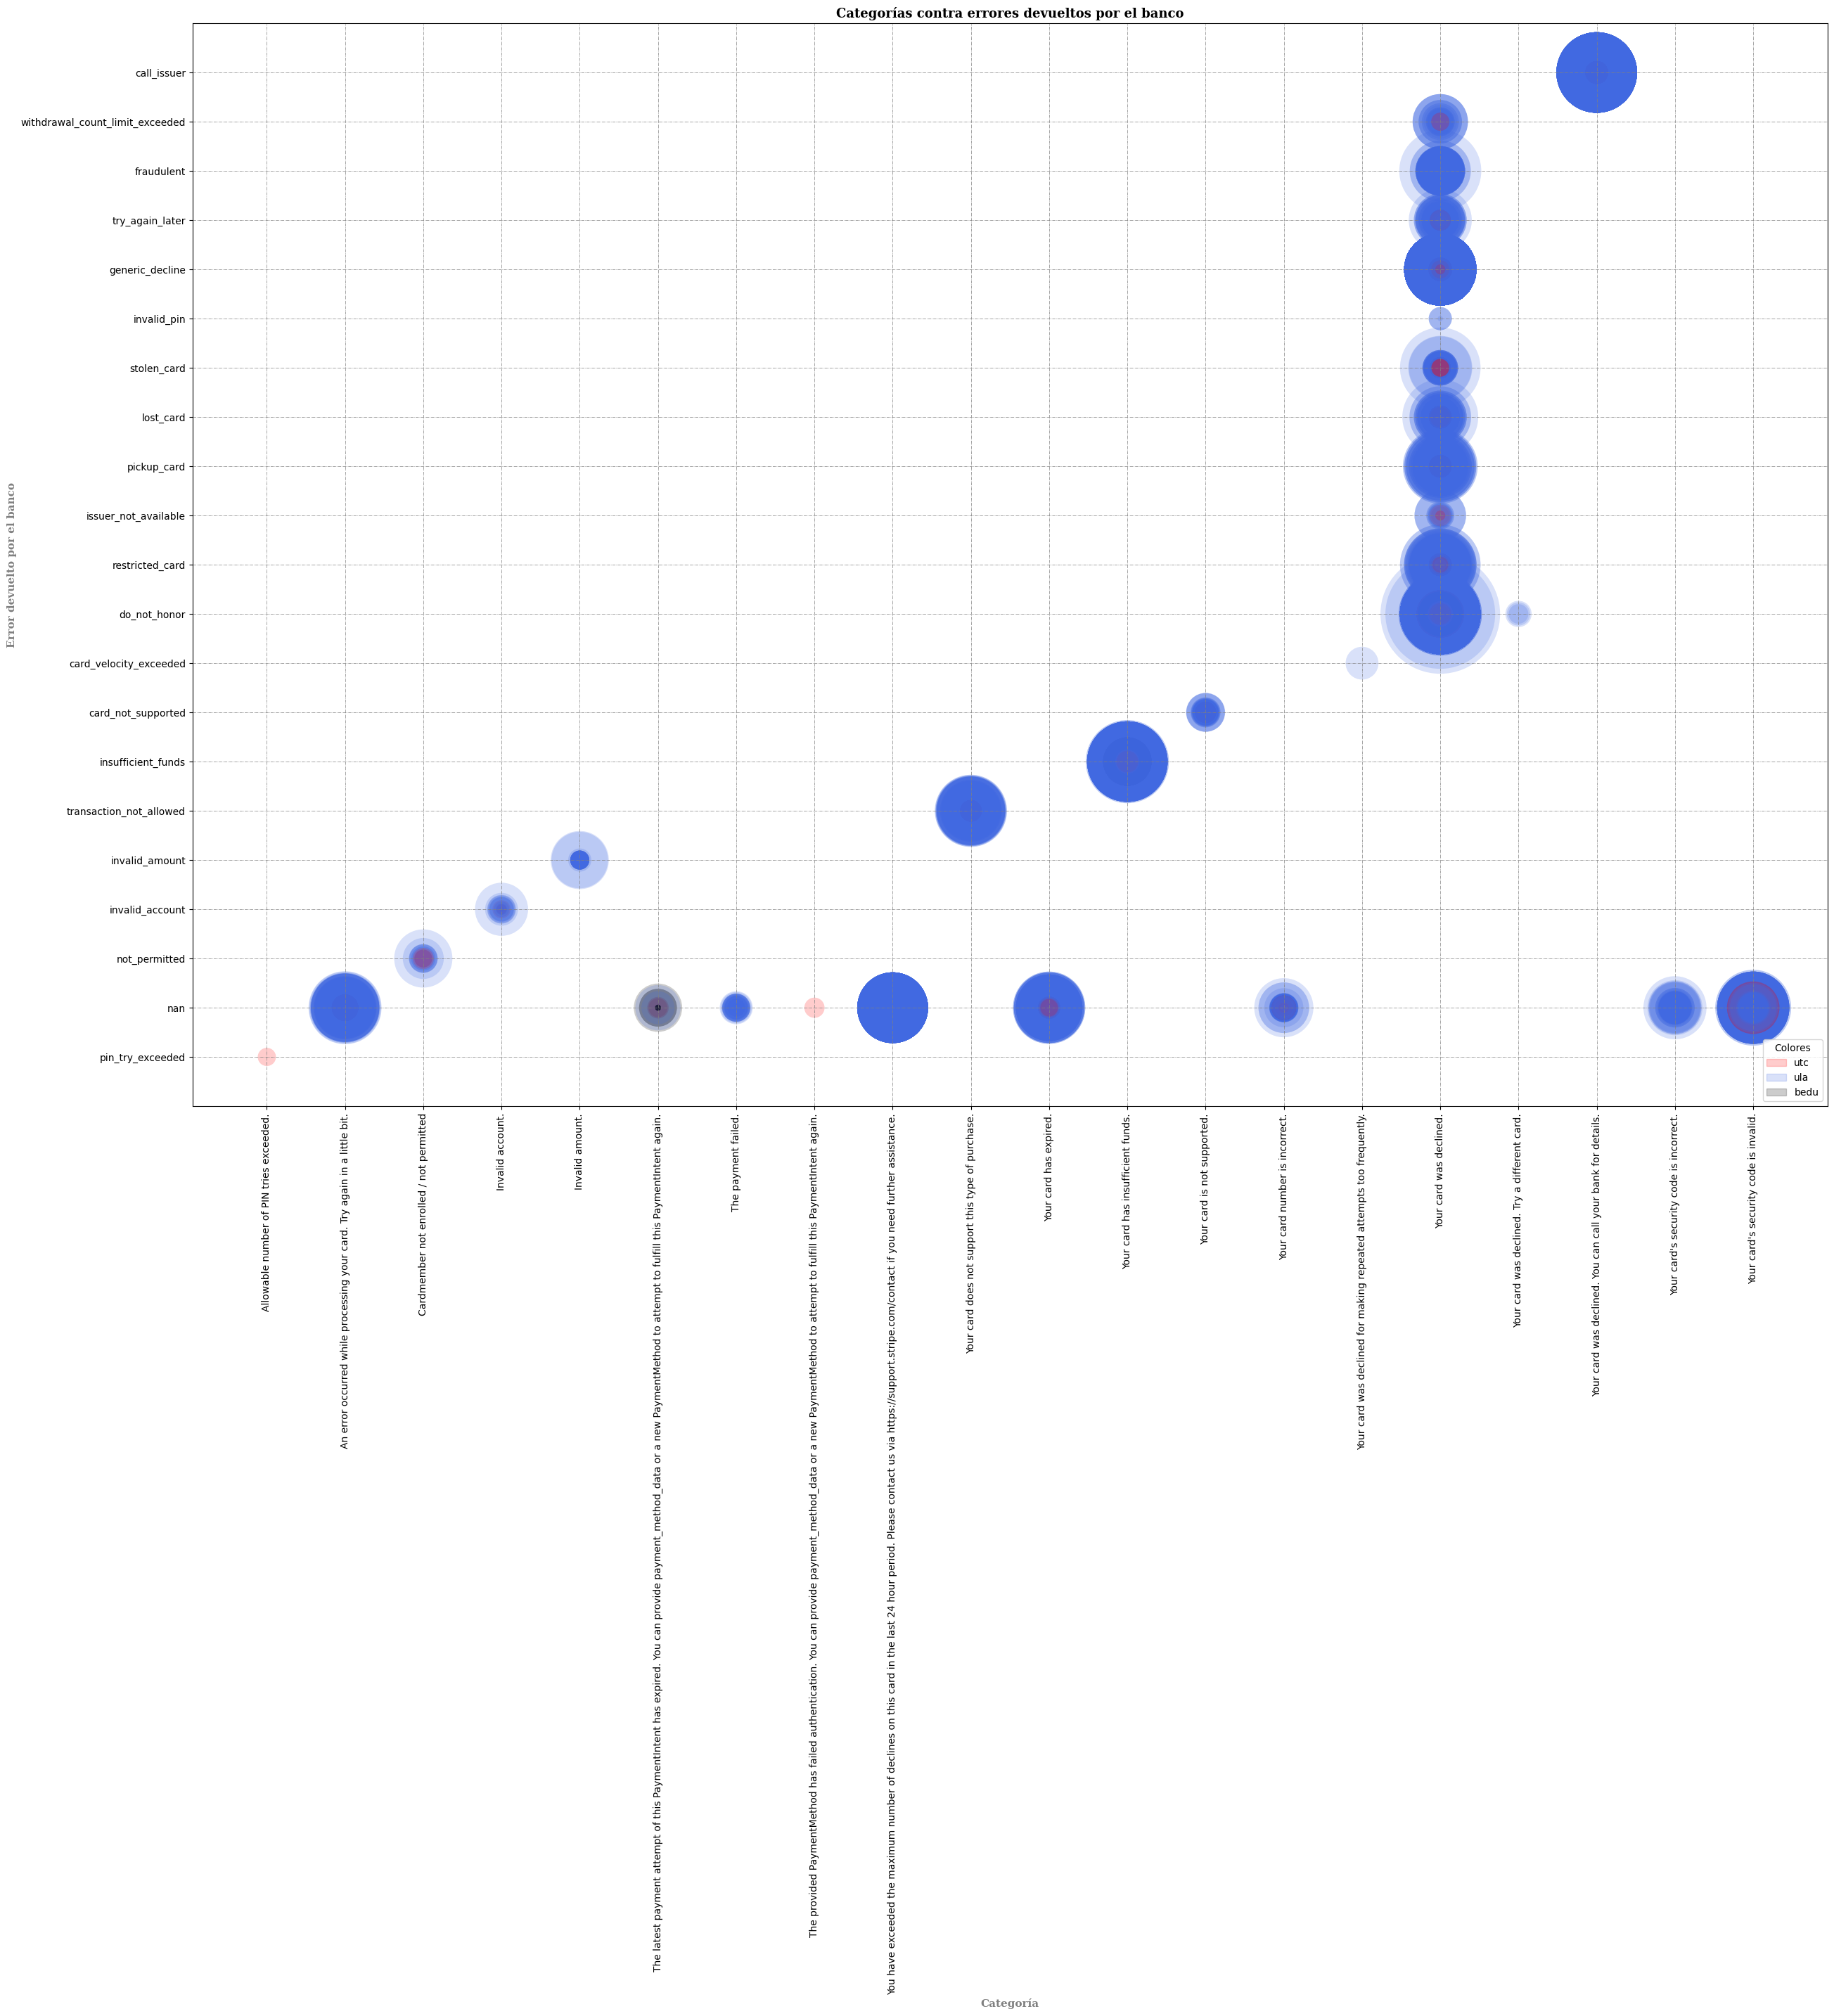

In [19]:
plt.rcParams['figure.figsize'] = [30, 20]
plt.grid(True, color='gray', linestyle='-.', linewidth=0.5)
plt.gca().patch.set_facecolor('1')

font_t = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 13,
        }
font_st = {'family': 'serif',
        'color':  'gray',
        'weight': 'bold',
        'size': 11,
        }

plt.scatter(df_large['error_message'], df_large['error_decline_code'],
            s=df_large['norm_price'], c=df_large['on_scale'], alpha=alpha_val, edgecolors="none")

plt.title('Categorías contra errores devueltos por el banco', fontdict=font_t)
plt.xlabel('Categoría', fontdict=font_st)
plt.ylabel('Error devuelto por el banco', fontdict=font_st)

red_patch = mpatches.Patch(color='red', alpha=alpha_val,
                           label='utc')
navy_patch = mpatches.Patch(color='royalblue', alpha=alpha_val,
                           label='ula')
black_patch = mpatches.Patch(color='black', alpha=alpha_val,
                           label='bedu')
plt.legend(handles=[red_patch, navy_patch, black_patch], loc="lower right", title="Colores")
plt.xticks(rotation = 90)
plt.show()

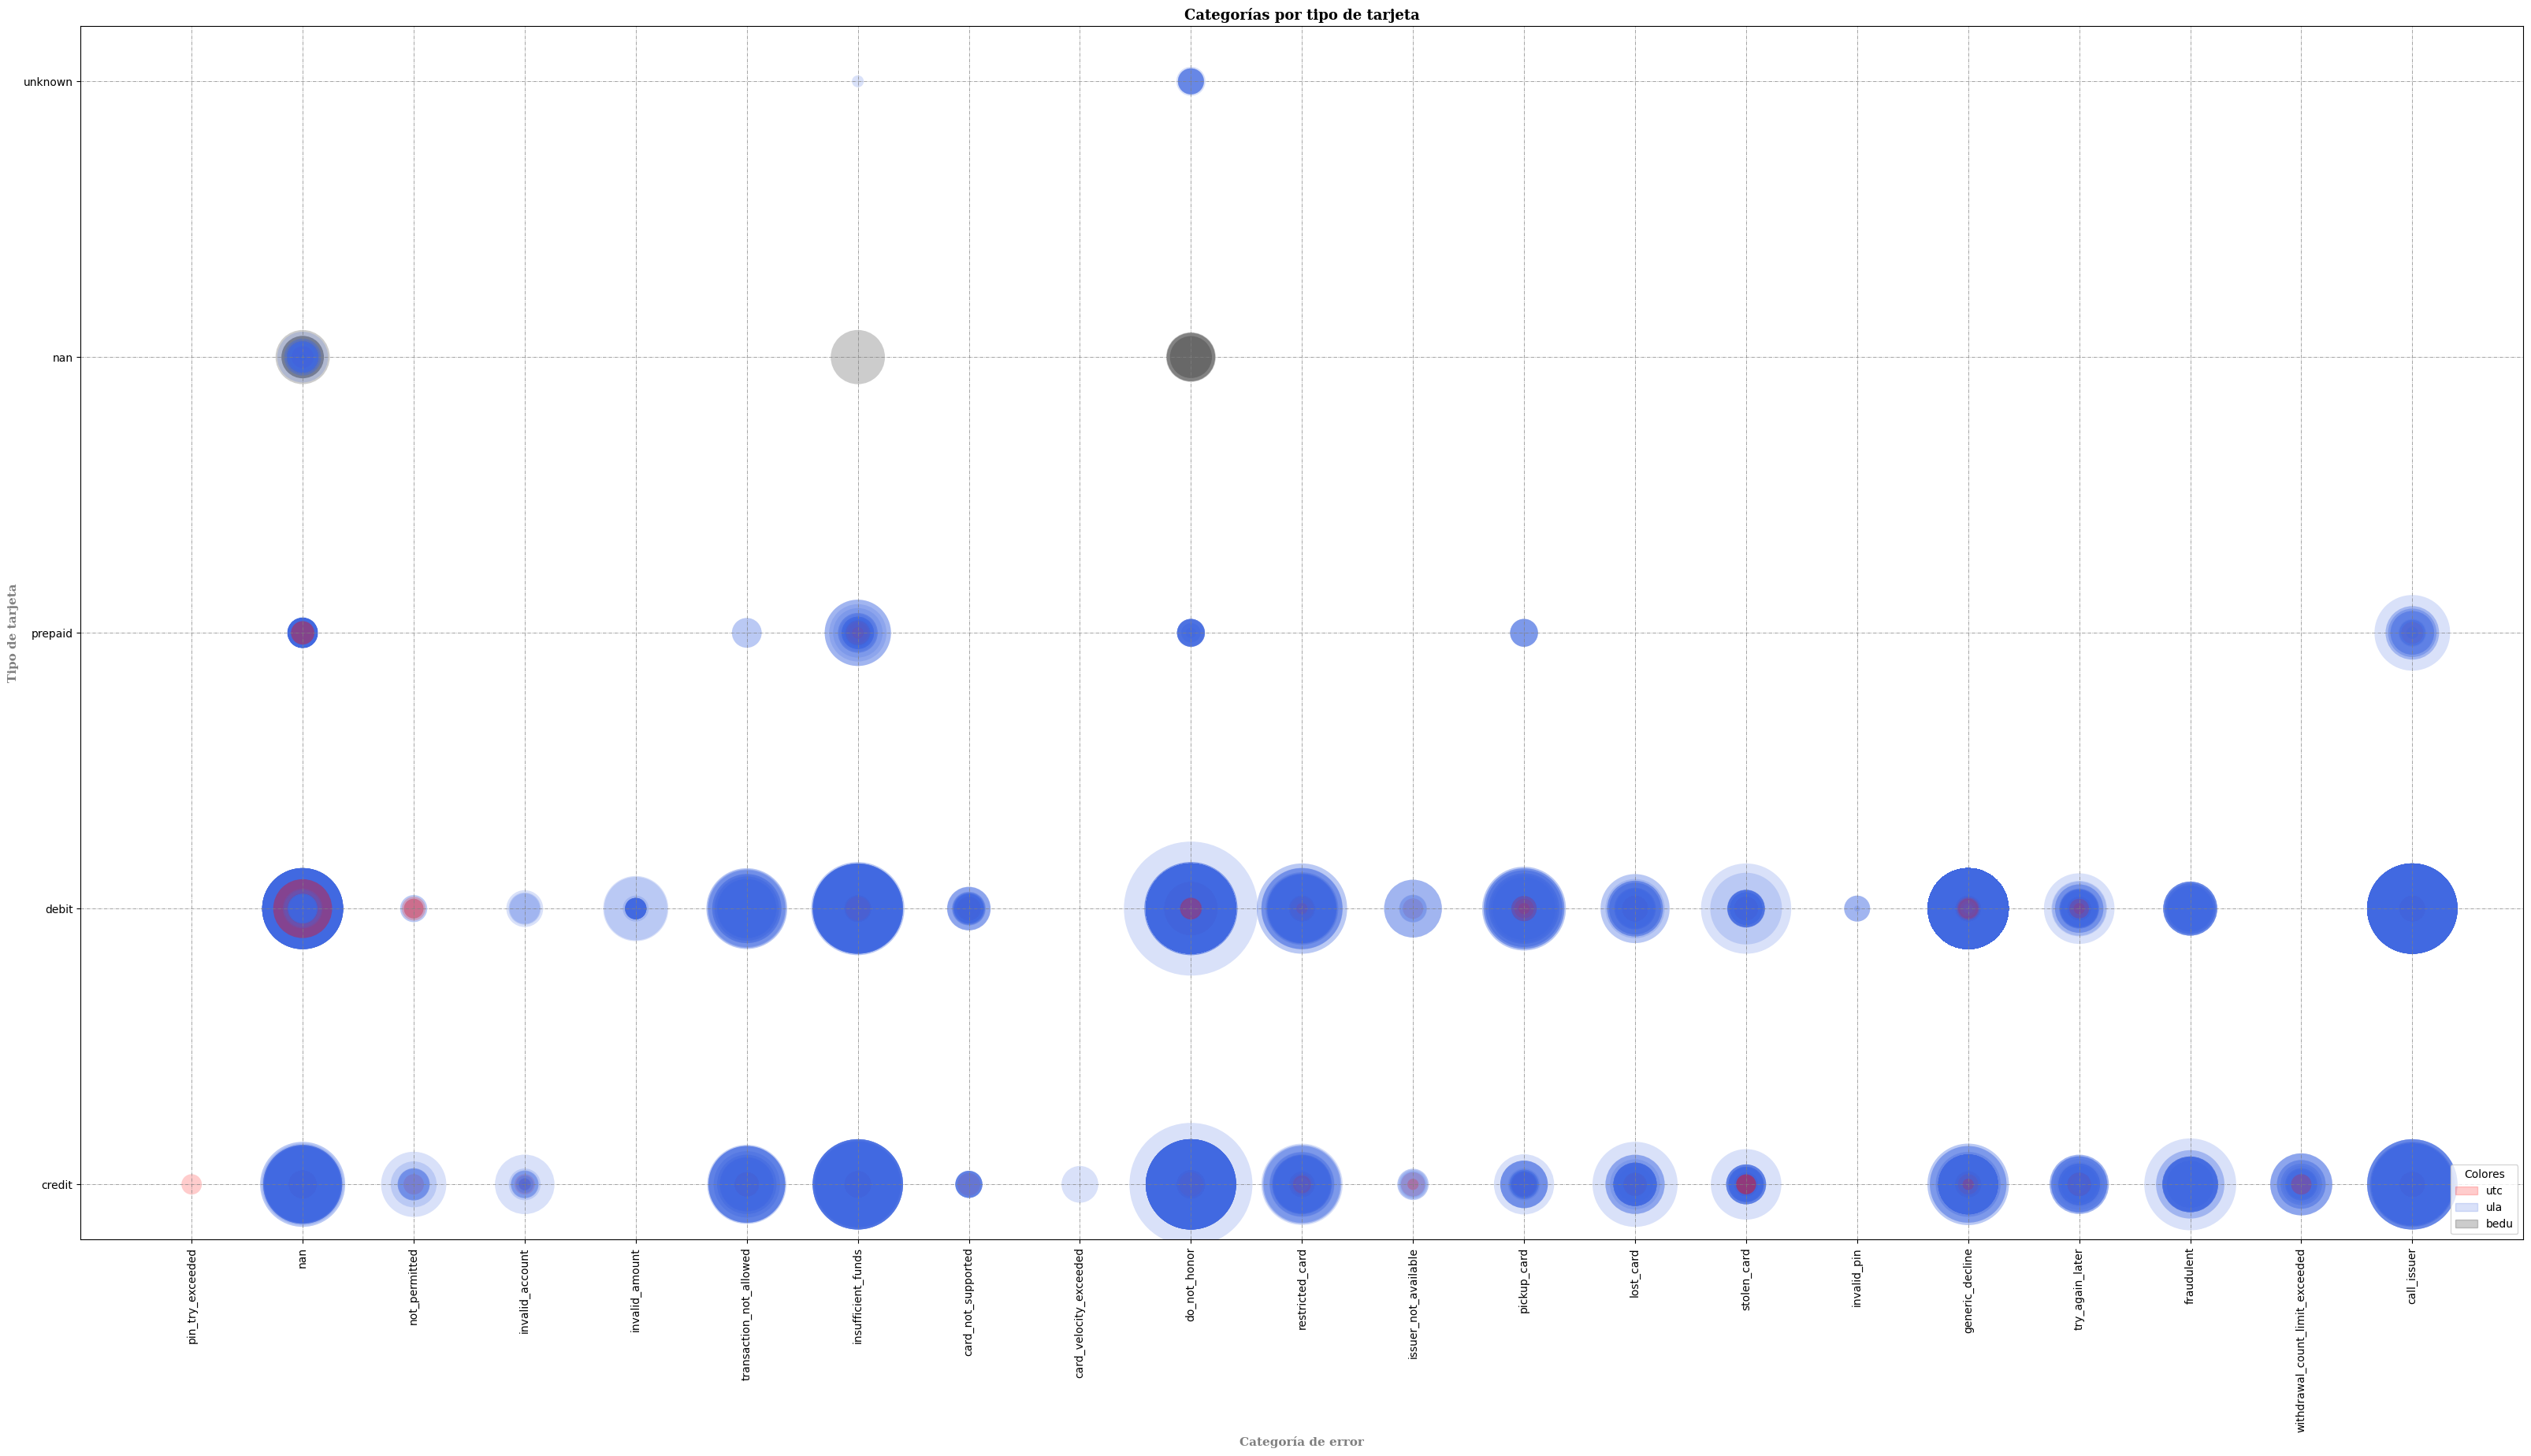

In [20]:
plt.rcParams['figure.figsize'] = [40, 20]
plt.grid(True, color='gray', linestyle='-.', linewidth=0.5)
plt.gca().patch.set_facecolor('1')

font_t = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 13,
        }
font_st = {'family': 'serif',
        'color':  'gray',
        'weight': 'bold',
        'size': 11,
        }

plt.scatter(df_large['error_decline_code'], df_large['tipo_tarjeta'],
            s=df_large['norm_price'], c=df_large['on_scale'], alpha=alpha_val, edgecolors="none")

plt.title('Categorías por tipo de tarjeta', fontdict=font_t)
plt.xlabel('Categoría de error', fontdict=font_st)
plt.ylabel('Tipo de tarjeta', fontdict=font_st)

red_patch = mpatches.Patch(color='red', alpha=alpha_val,
                           label='utc')
navy_patch = mpatches.Patch(color='royalblue', alpha=alpha_val,
                           label='ula')
black_patch = mpatches.Patch(color='black', alpha=alpha_val,
                           label='bedu')
plt.legend(handles=[red_patch, navy_patch, black_patch], loc="lower right", title="Colores")
plt.xticks(rotation = 90)
plt.show()

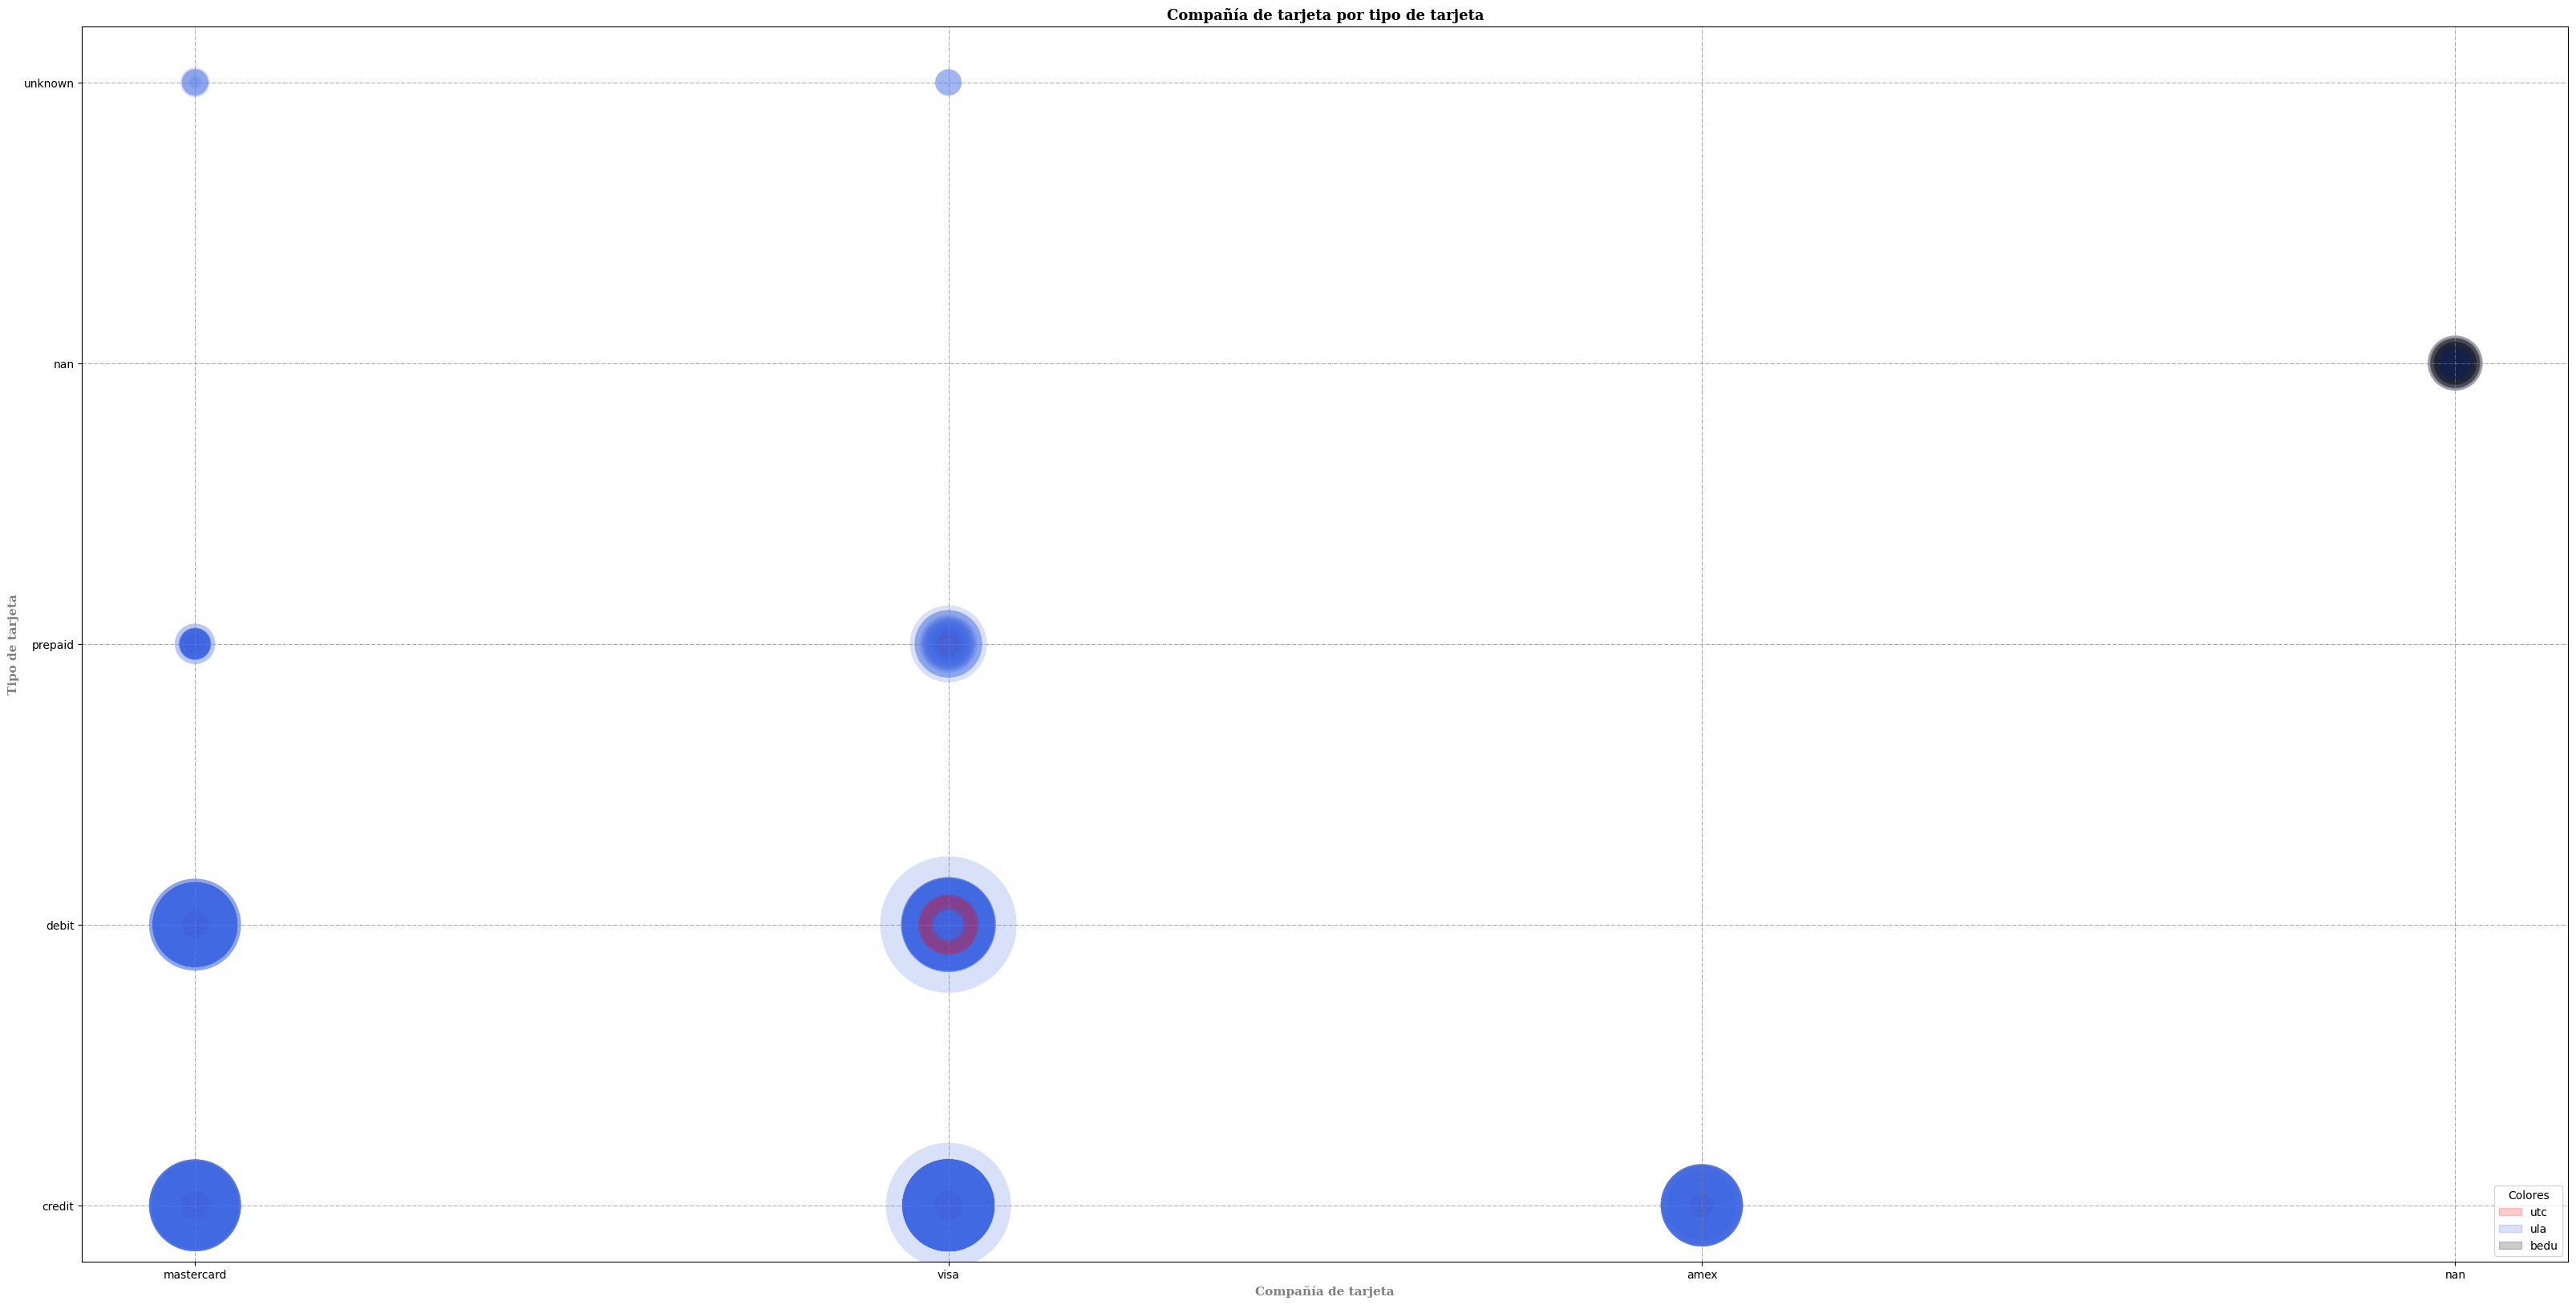

In [21]:
plt.rcParams['figure.figsize'] = [40, 20]
plt.grid(True, color='gray', linestyle='-.', linewidth=0.5)
plt.gca().patch.set_facecolor('1')

font_t = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 13,
        }
font_st = {'family': 'serif',
        'color':  'gray',
        'weight': 'bold',
        'size': 11,
        }

plt.scatter(df_large['card_company'], df_large['tipo_tarjeta'],
            s=df_large['norm_price'], c=df_large['on_scale'], alpha=alpha_val, edgecolors="none")

plt.title('Compañía de tarjeta por tipo de tarjeta', fontdict=font_t)
plt.xlabel('Compañía de tarjeta', fontdict=font_st)
plt.ylabel('Tipo de tarjeta', fontdict=font_st)

red_patch = mpatches.Patch(color='red', alpha=alpha_val,
                           label='utc')
navy_patch = mpatches.Patch(color='royalblue', alpha=alpha_val,
                           label='ula')
black_patch = mpatches.Patch(color='black', alpha=alpha_val,
                           label='bedu')
plt.legend(handles=[red_patch, navy_patch, black_patch], loc="lower right", title="Colores")

plt.show()

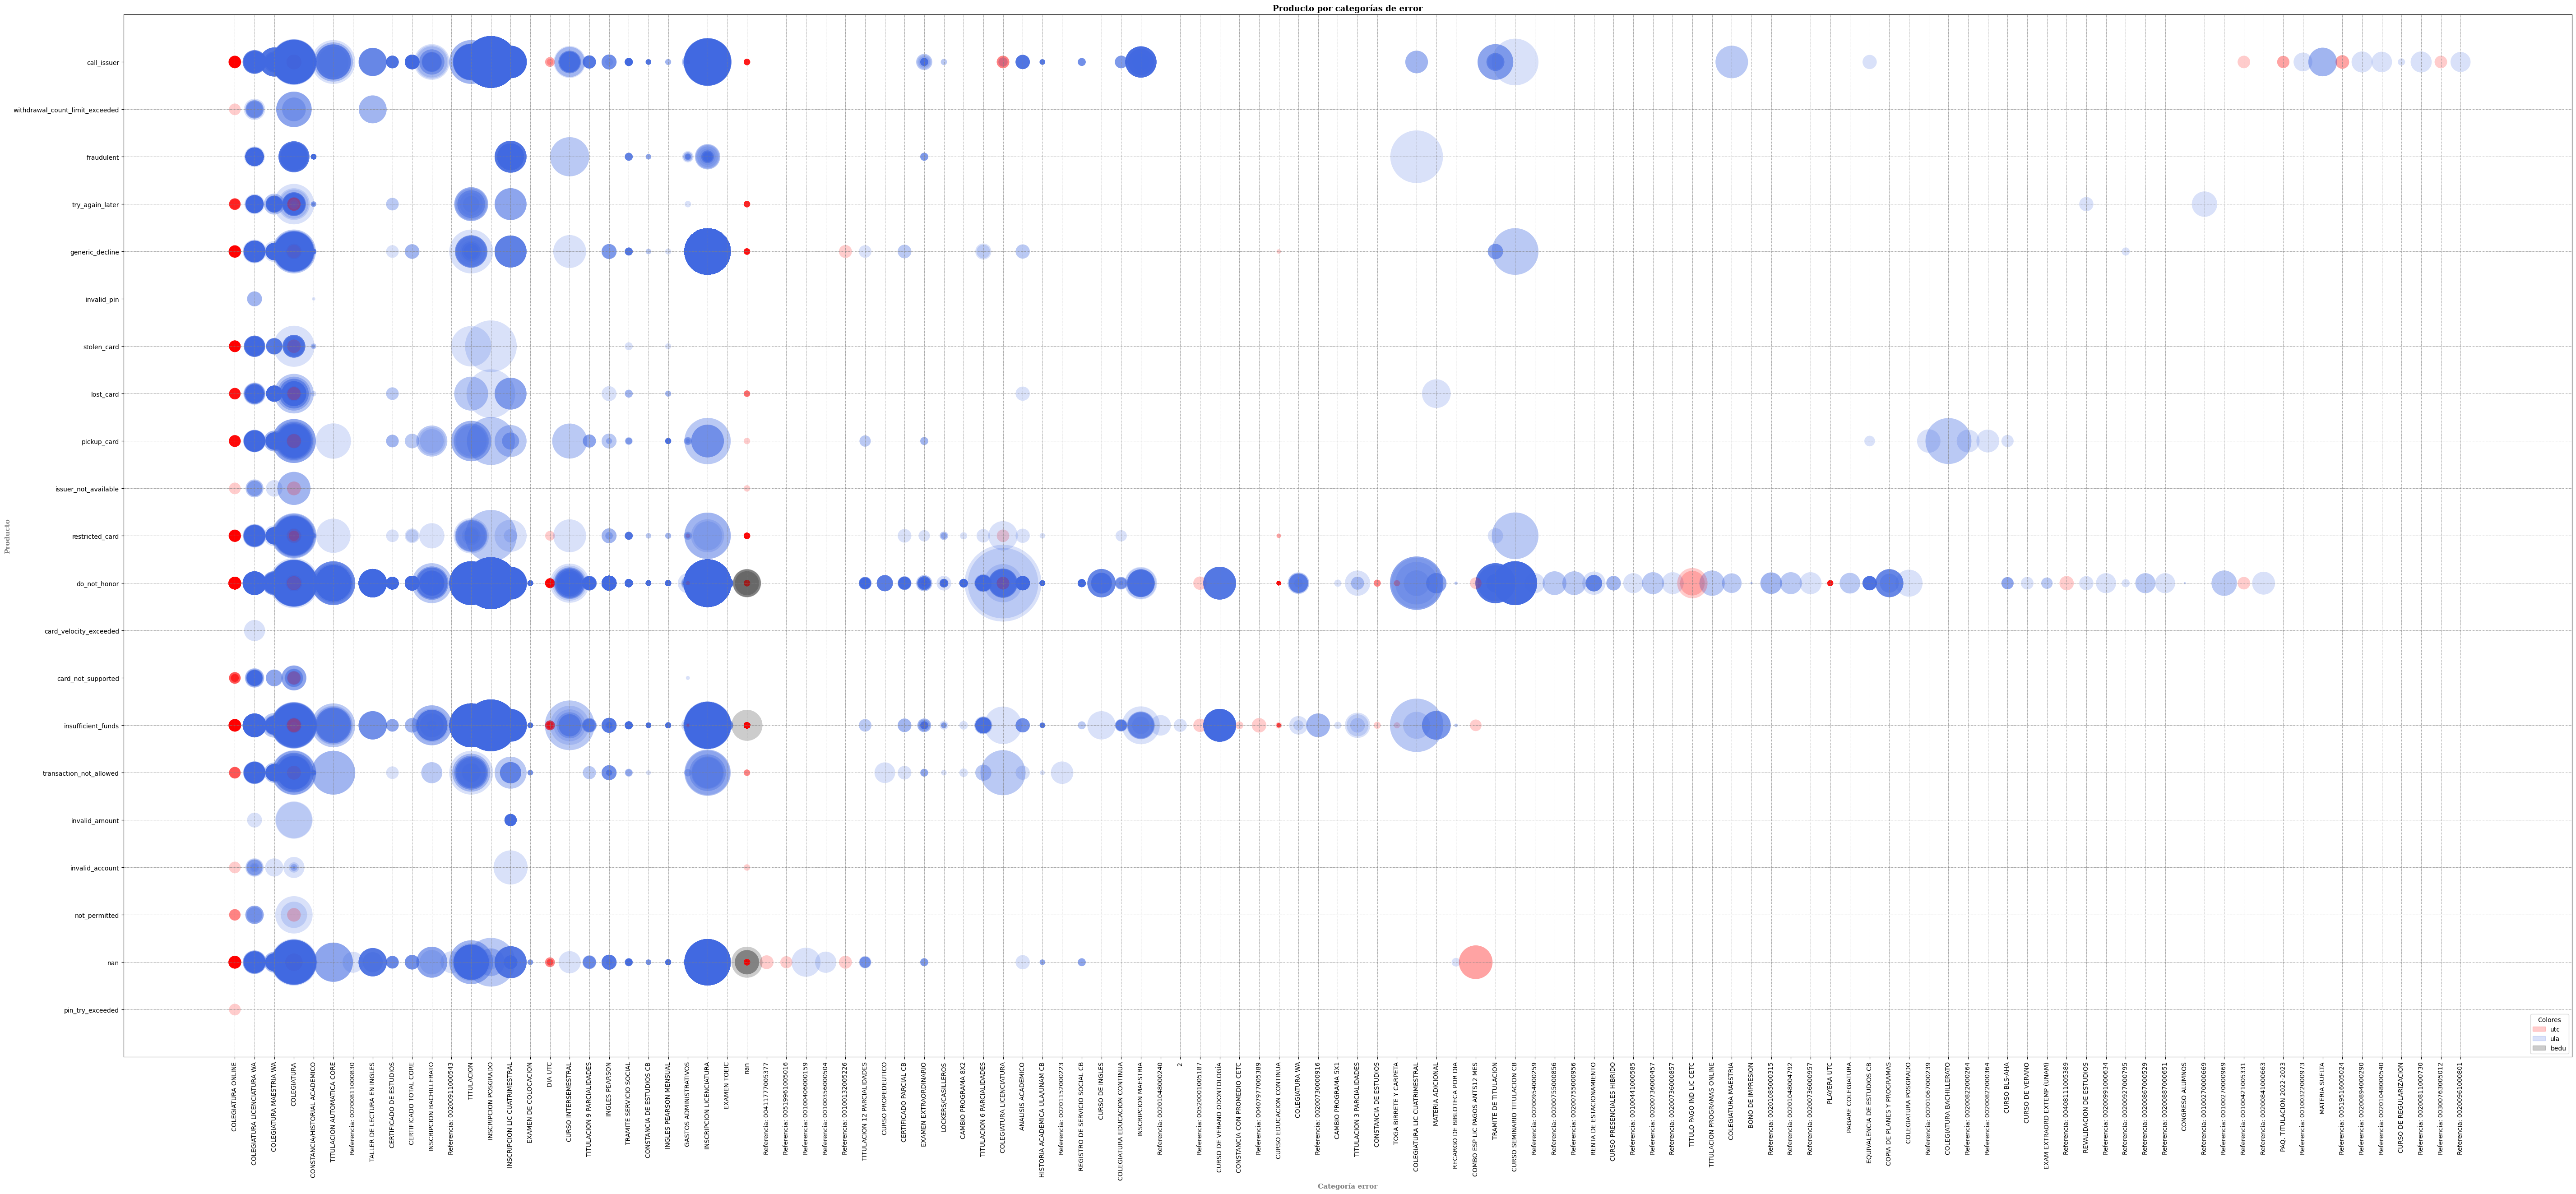

In [22]:
plt.rcParams['figure.figsize'] = [70, 30]
plt.grid(True, color='gray', linestyle='-.', linewidth=0.5)
plt.gca().patch.set_facecolor('1')

font_t = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 13,
        }
font_st = {'family': 'serif',
        'color':  'gray',
        'weight': 'bold',
        'size': 11,
        }

plt.scatter(df_large['product'], df_large['error_decline_code'],
            s=df_large['norm_price'], c=df_large['on_scale'], alpha=alpha_val, edgecolors="none")

plt.title('Producto por categorías de error', fontdict=font_t)
plt.xlabel('Categoría error', fontdict=font_st)
plt.ylabel('Producto', fontdict=font_st)

red_patch = mpatches.Patch(color='red', alpha=alpha_val,
                           label='utc')
navy_patch = mpatches.Patch(color='royalblue', alpha=alpha_val,
                           label='ula')
black_patch = mpatches.Patch(color='black', alpha=alpha_val,
                           label='bedu')
plt.legend(handles=[red_patch, navy_patch, black_patch], loc="lower right", title="Colores")
plt.xticks(rotation = 90)
plt.show()

## Análisis de dimensión **clientes**

```Python
cus = df_large["customer"].value_counts()
cus
```

```Python
customer_sum = df_large.groupby(by="customer")["current_total_price"].sum()
customer_sum
```

```Python
customer_sum / cus
```

## Análisis de dimensión **marca**

In [23]:
marca = df_large["marca"].value_counts()
marca

marca
ula     55716
utc      3772
bedu       18
Name: count, dtype: int64

In [24]:
marca_sum = df_large.groupby(by="marca")["current_total_price"].sum()
marca_sum

marca
bedu    5.780000e+04
ula     2.013431e+08
utc     5.150608e+06
Name: current_total_price, dtype: float64

In [25]:
marca_sum / marca

marca
bedu    3211.111111
ula     3613.738998
utc     1365.484674
dtype: float64

## Análisis de dimensión **producto**

product
COLEGIATURA LICENCIATURA WA       33054
COLEGIATURA                       11493
COLEGIATURA MAESTRIA WA            5134
CONSTANCIA/HISTORIAL ACADEMICO     1653
COLEGIATURA ONLINE                 1545
INSCRIPCION LICENCIATURA           1148
TITULACION                          874
TRAMITE SERVICIO SOCIAL             655
INSCRIPCION LIC CUATRIMESTRAL       558
GASTOS ADMINISTRATIVOS              316
INSCRIPCION POSGRADO                275
nan                                 255
CONSTANCIA DE ESTUDIOS CB           222
CERTIFICADO TOTAL CORE              182
INGLES PEARSON                      180
EXAMEN EXTRAORDINARIO               155
INGLES PEARSON MENSUAL              148
CERTIFICADO DE ESTUDIOS             129
TITULACION AUTOMATICA CORE          128
EXAMEN DE COLOCACION                123
TITULACION 9 PARCIALIDADES          107
HISTORIA ACADEMICA ULA/UNAM CB       87
TALLER DE LECTURA EN INGLES          81
INSCRIPCION BACHILLERATO             68
TITULACION 6 PARCIALIDADES      

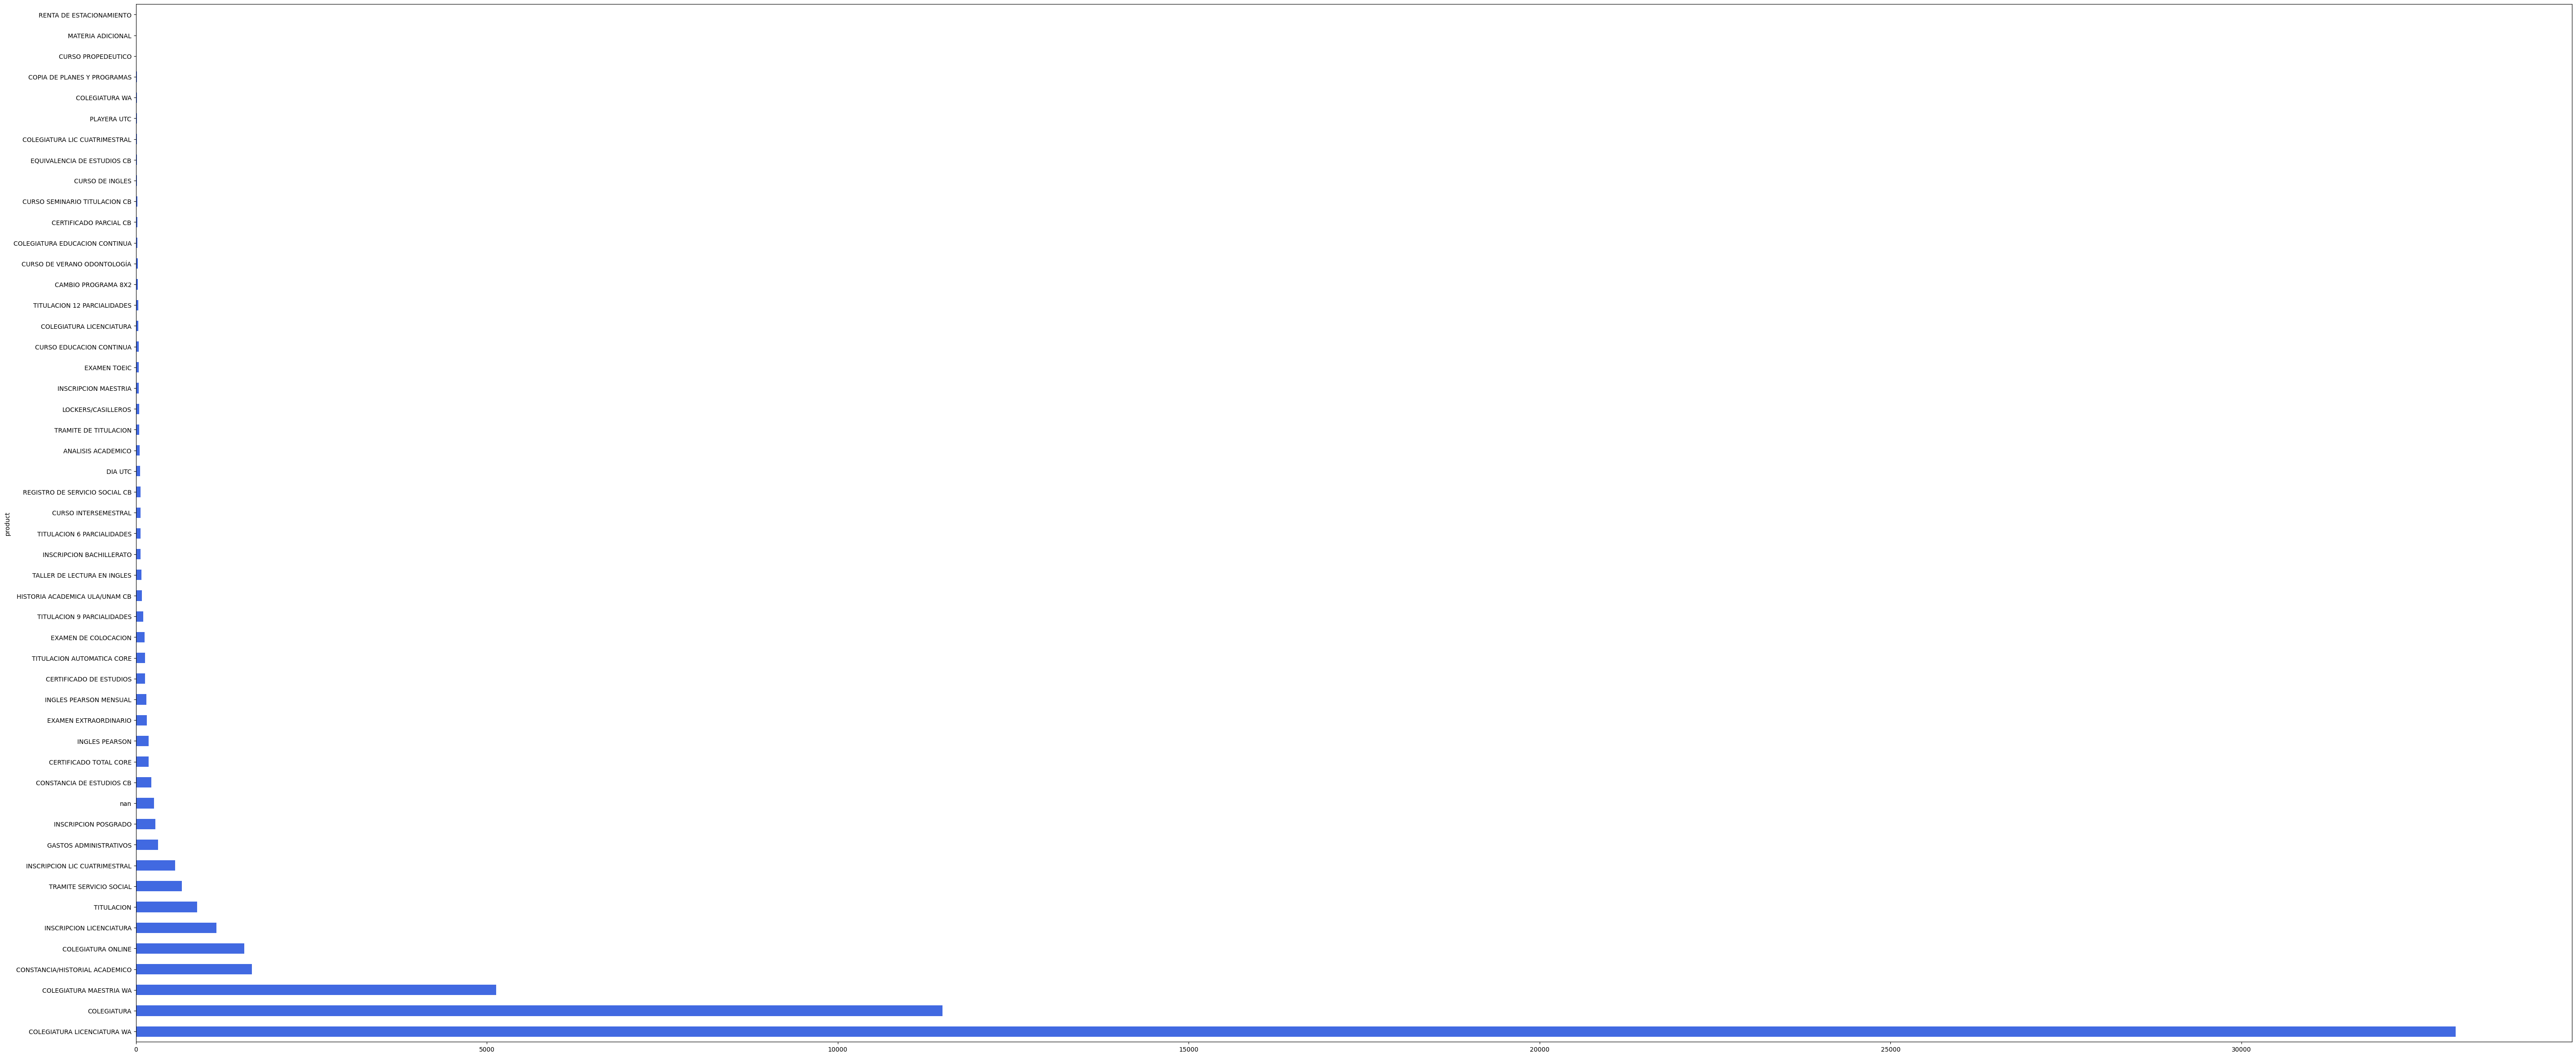

In [26]:
producto = df_large["product"].value_counts()
df_large["product"].value_counts()[:50].plot(kind="barh", color="royalblue")
producto.head(50)

product
2                             1611.11
ANALISIS ACADEMICO           98800.00
BONO DE IMPRESION              165.00
CAMBIO PROGRAMA 5X1           1000.00
CAMBIO PROGRAMA 8X2          18900.00
                              ...    
TITULO PAGO IND LIC CETC     14292.20
TOGA BIRRETE Y CARPETA        1080.00
TRAMITE DE TITULACION       343427.39
TRAMITE SERVICIO SOCIAL     344453.20
nan                         152363.00
Name: current_total_price, Length: 114, dtype: float64

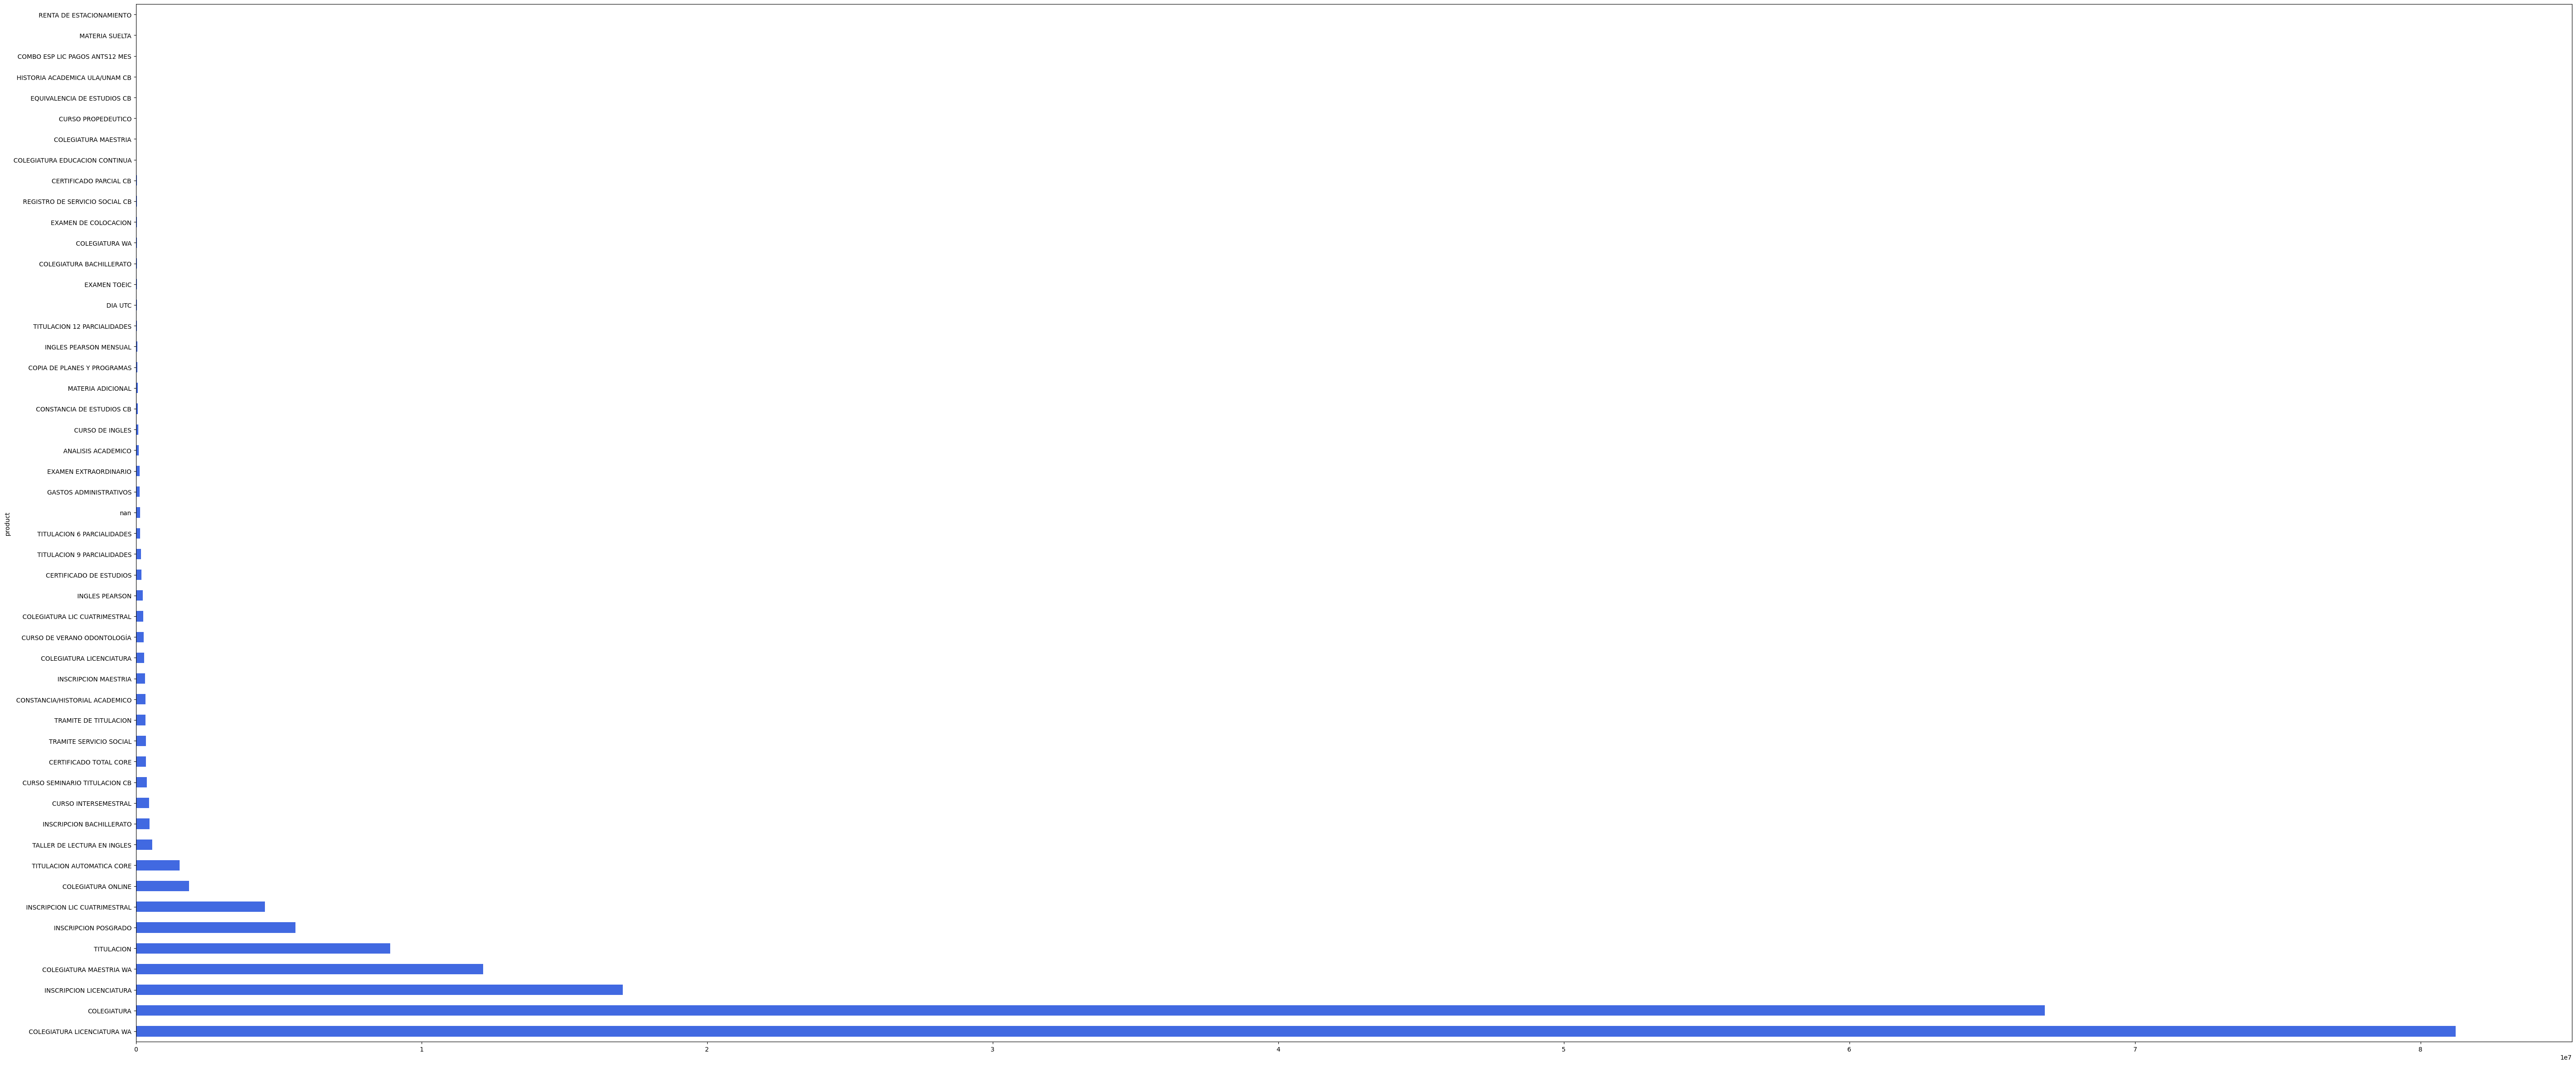

In [27]:
product_sum = df_large.groupby(by="product")["current_total_price"].sum()
df_large.groupby(by="product")["current_total_price"].sum().sort_values(ascending=False)[:50].plot(kind="barh", color="royalblue")
product_sum

In [28]:
product_sum / producto

product
2                           1611.110000
ANALISIS ACADEMICO          1900.000000
BONO DE IMPRESION             55.000000
CAMBIO PROGRAMA 5X1          500.000000
CAMBIO PROGRAMA 8X2          609.677419
                               ...     
TITULO PAGO IND LIC CETC    7146.100000
TOGA BIRRETE Y CARPETA       360.000000
TRAMITE DE TITULACION       7465.812826
TRAMITE SERVICIO SOCIAL      525.882748
nan                          597.501961
Length: 114, dtype: float64

## Análisis de dimensión **tipo_tarjeta**

In [29]:
tipo_tarjeta = df_large["tipo_tarjeta"].value_counts()
tipo_tarjeta

tipo_tarjeta
debit      34377
credit     24927
prepaid      152
nan           42
unknown        8
Name: count, dtype: int64

In [30]:
tipo_tarjeta_sum = df_large.groupby(by="tipo_tarjeta")["current_total_price"].sum()
tipo_tarjeta_sum

tipo_tarjeta
credit     8.810660e+07
debit      1.178915e+08
nan        1.215195e+05
prepaid    4.162923e+05
unknown    1.553900e+04
Name: current_total_price, dtype: float64

In [31]:
tipo_tarjeta_sum / tipo_tarjeta

tipo_tarjeta
credit     3534.584824
debit      3429.372647
nan        2893.321667
prepaid    2738.765263
unknown    1942.375000
dtype: float64

## Análisis de dimensión **card_company**

In [32]:
card_company = df_large["card_company"].value_counts()
card_company

card_company
visa          47512
mastercard    11359
amex            593
nan              42
Name: count, dtype: int64

In [33]:
card_company_sum = df_large.groupby(by="card_company")["current_total_price"].sum()
card_company_sum

card_company
amex          2.759931e+06
mastercard    4.103989e+07
nan           1.215195e+05
visa          1.626302e+08
Name: current_total_price, dtype: float64

In [34]:
card_company_sum / card_company

card_company
amex          4654.182985
mastercard    3612.984271
nan           2893.321667
visa          3422.927931
dtype: float64

## Análisis de dimensiones **card_company** y **tipo_tarjeta**

card_company  tipo_tarjeta
visa          debit           30461
              credit          16970
mastercard    credit           7364
              debit            3916
amex          credit            593
visa          prepaid            78
mastercard    prepaid            74
nan           nan                42
mastercard    unknown             5
visa          unknown             3
Name: count, dtype: int64

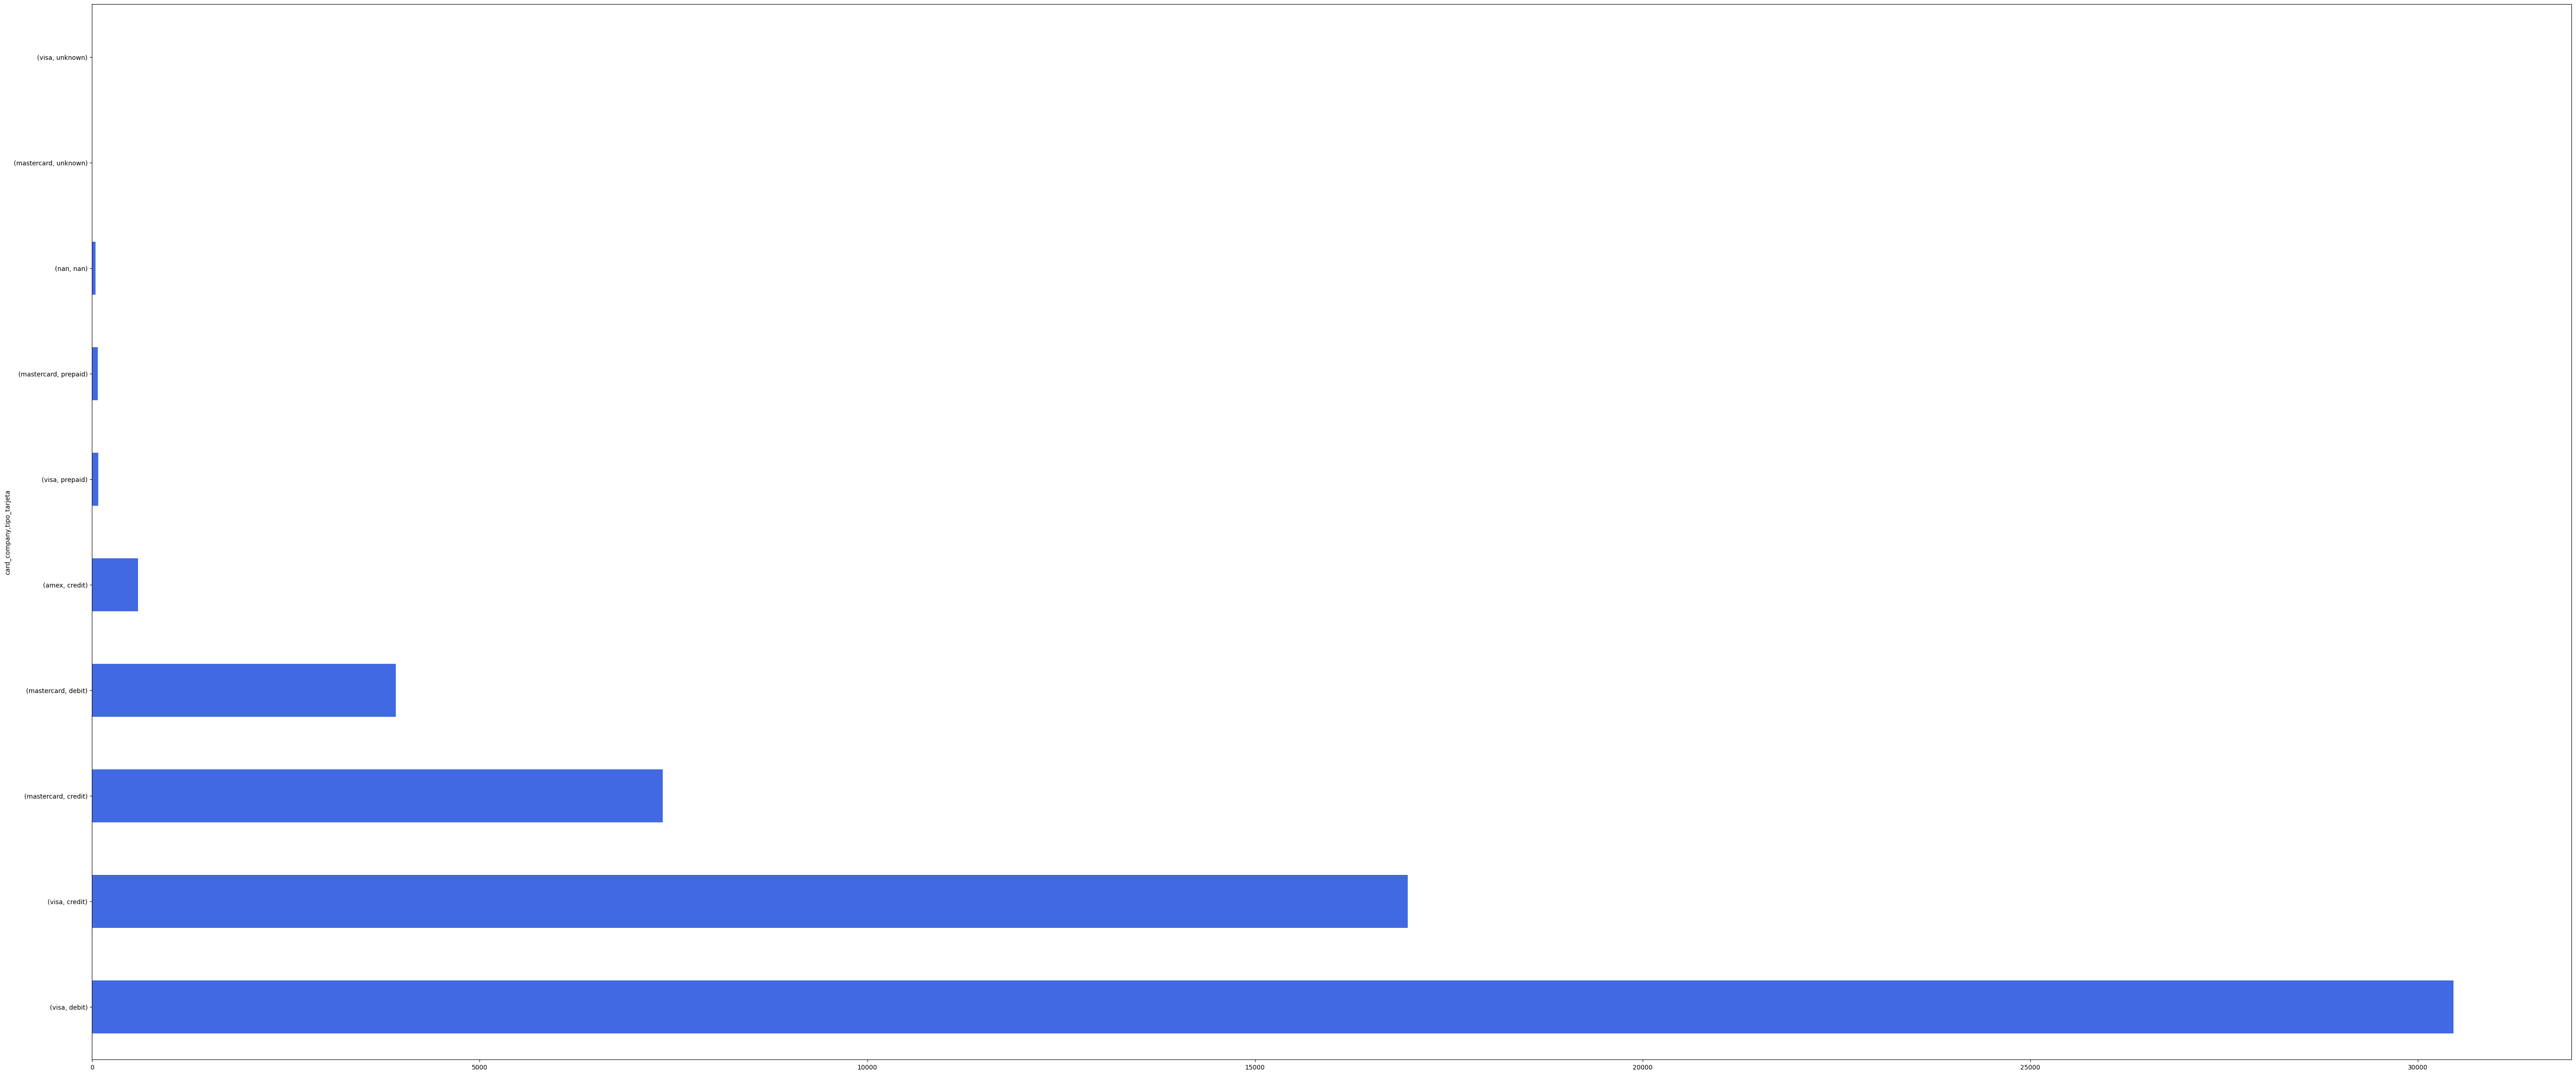

In [35]:
tipo_tarjeta_company = df_large[["card_company","tipo_tarjeta"]].value_counts()
df_large[["card_company","tipo_tarjeta"]].value_counts().plot(kind="barh", color="royalblue")
tipo_tarjeta_company

tipo_tarjeta  card_company
credit        amex            2.759931e+06
              mastercard      2.511658e+07
              nan             0.000000e+00
              visa            6.023008e+07
debit         amex            0.000000e+00
              mastercard      1.573350e+07
              nan             0.000000e+00
              visa            1.021580e+08
nan           amex            0.000000e+00
              mastercard      0.000000e+00
              nan             1.215195e+05
              visa            0.000000e+00
prepaid       amex            0.000000e+00
              mastercard      1.805024e+05
              nan             0.000000e+00
              visa            2.357899e+05
unknown       amex            0.000000e+00
              mastercard      9.302000e+03
              nan             0.000000e+00
              visa            6.237000e+03
Name: current_total_price, dtype: float64

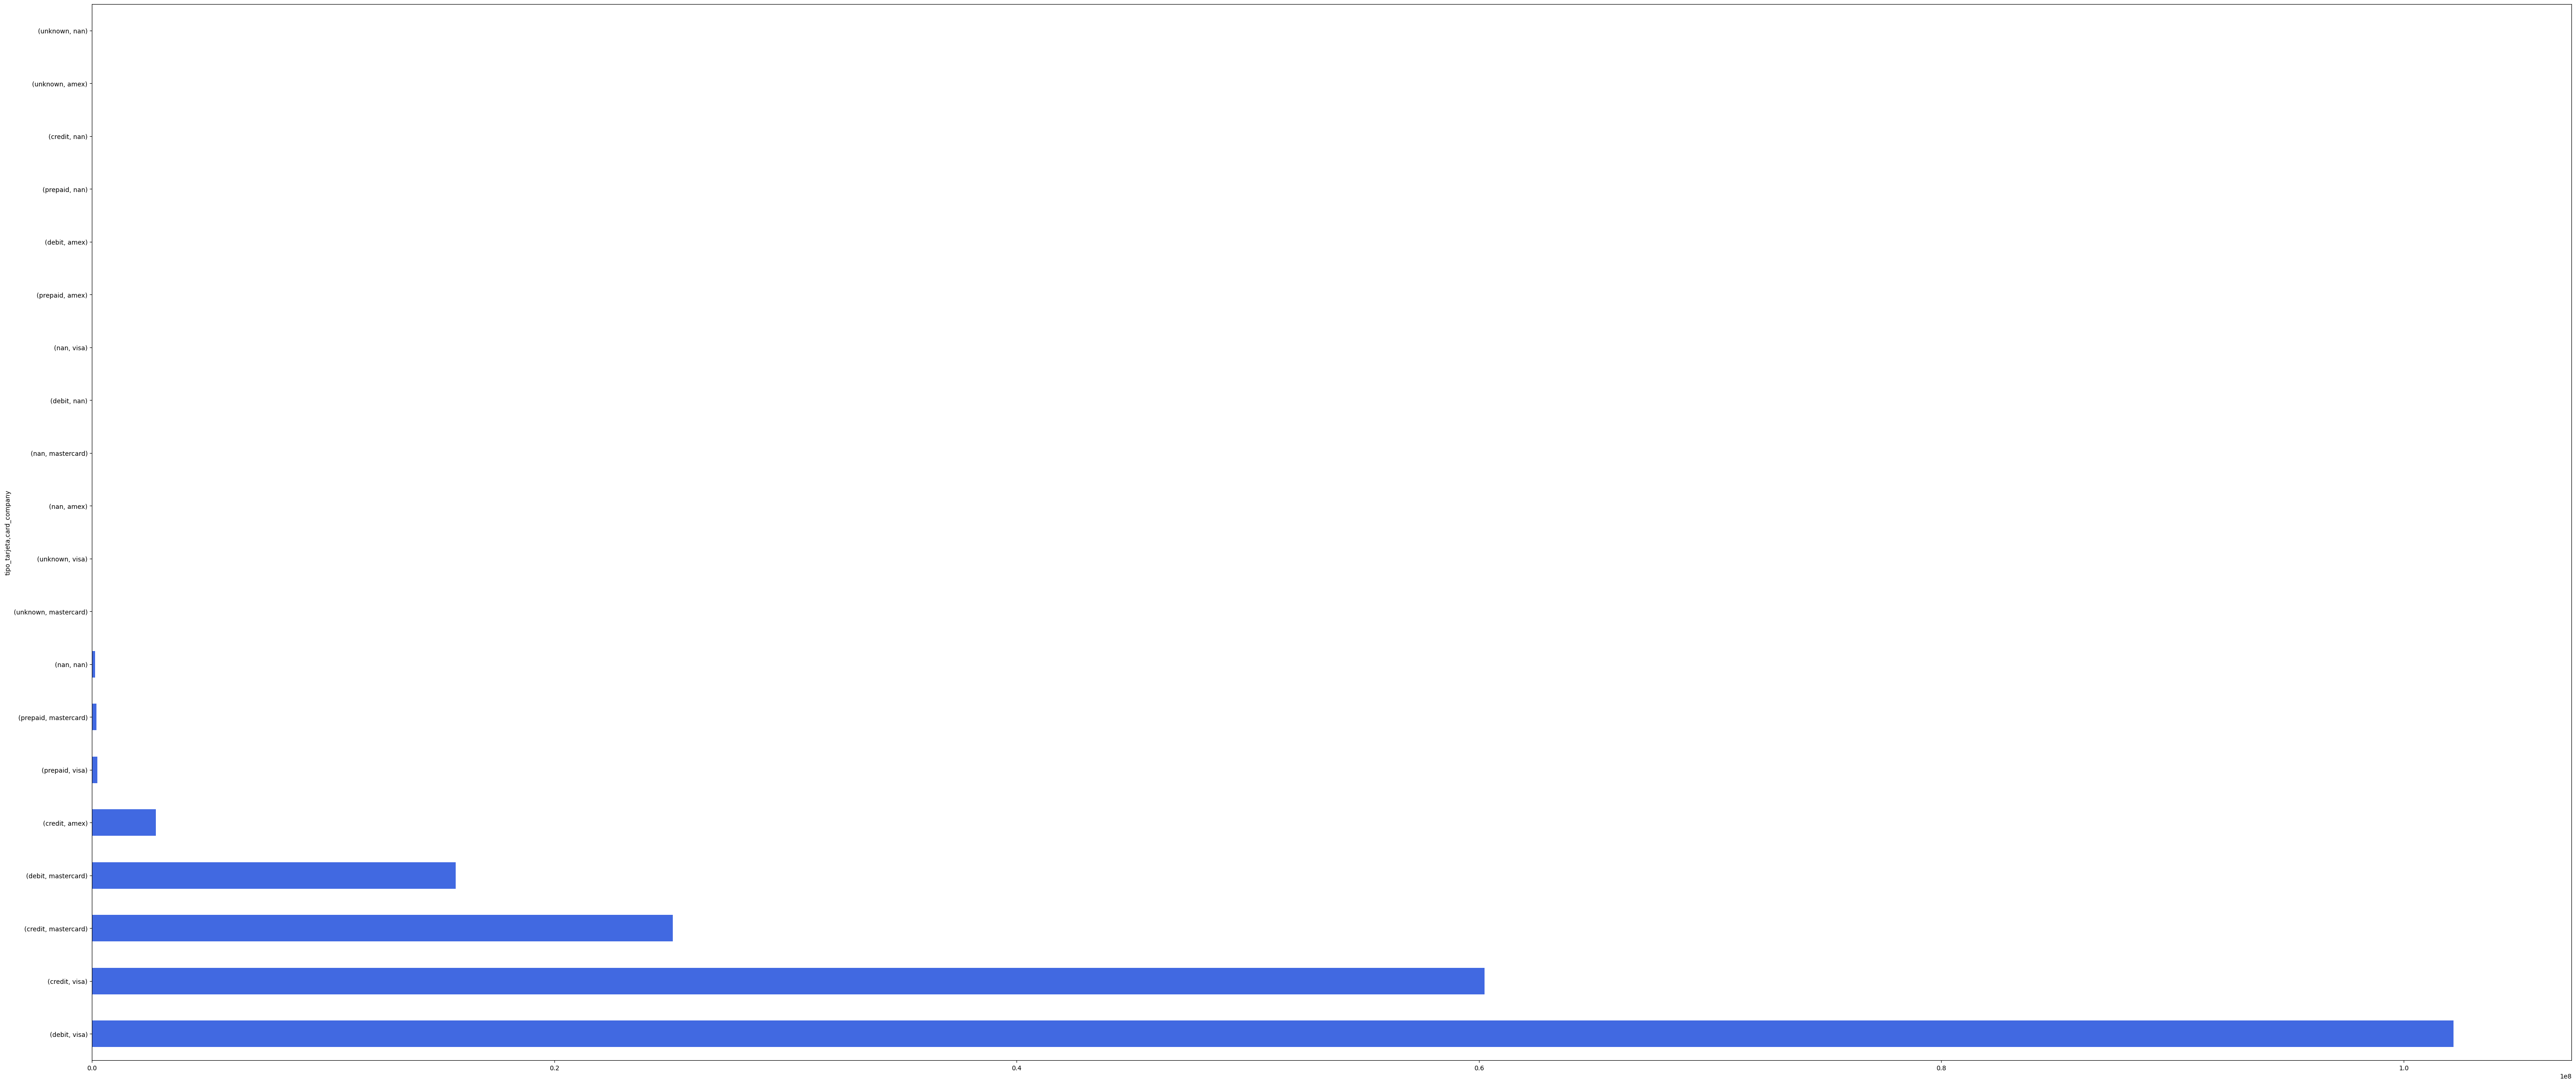

In [36]:
tipo_tarjeta_company_sum = df_large.groupby(["tipo_tarjeta", "card_company"])["current_total_price"].sum()
df_large.groupby(["tipo_tarjeta", "card_company"])["current_total_price"].sum().sort_values(ascending=False).plot(kind="barh", color="royalblue")
tipo_tarjeta_company_sum

In [37]:
tipo_tarjeta_company_sum / tipo_tarjeta_company

tipo_tarjeta  card_company
credit        amex            4654.182985
              mastercard      3410.725676
              nan                     NaN
              visa            3549.209282
debit         amex                    NaN
              mastercard      4017.747715
              nan                     NaN
              visa            3353.732426
nan           amex                    NaN
              mastercard              NaN
              nan             2893.321667
              visa                    NaN
prepaid       amex                    NaN
              mastercard      2439.221622
              nan                     NaN
              visa            3022.947692
unknown       amex                    NaN
              mastercard      1860.400000
              nan                     NaN
              visa            2079.000000
dtype: float64

## Análisis de dimensión **error_message**

In [38]:
error_message = df_large["error_message"].value_counts()
error_message

error_message
Your card was declined.                                                                                                                                                               43140
Your card has insufficient funds.                                                                                                                                                      7111
Your card was declined. You can call your bank for details.                                                                                                                            4831
Your card does not support this type of purchase.                                                                                                                                      1183
An error occurred while processing your card. Try again in a little bit.                                                                                                                798
Your card has expired.                        

In [39]:
error_message_sum = df_large.groupby(by="error_message")["current_total_price"].sum()
error_message_sum

error_message
Allowable number of PIN tries exceeded.                                                                                                                                               1.290000e+03
An error occurred while processing your card. Try again in a little bit.                                                                                                              2.812873e+06
Cardmember not enrolled / not permitted                                                                                                                                               4.192714e+04
Invalid account.                                                                                                                                                                      3.633630e+04
Invalid amount.                                                                                                                                                                       4.970850e+04
The latest 

In [40]:
error_message_sum / error_message

error_message
Allowable number of PIN tries exceeded.                                                                                                                                               1290.000000
An error occurred while processing your card. Try again in a little bit.                                                                                                              3524.903133
Cardmember not enrolled / not permitted                                                                                                                                               3493.928333
Invalid account.                                                                                                                                                                      2137.429412
Invalid amount.                                                                                                                                                                       2616.236842
The latest payme

## Análisis de dimensión **error_decline_code**

In [41]:
error_decline_code = df_large["error_decline_code"].value_counts()
error_decline_code

error_decline_code
do_not_honor                       38020
insufficient_funds                  7111
call_issuer                         4831
nan                                 3126
generic_decline                     2225
transaction_not_allowed             1183
pickup_card                         1055
restricted_card                      881
fraudulent                           364
lost_card                            252
try_again_later                      172
stolen_card                          141
card_not_supported                    62
invalid_amount                        19
withdrawal_count_limit_exceeded       17
invalid_account                       17
not_permitted                         12
issuer_not_available                  12
invalid_pin                            4
pin_try_exceeded                       1
card_velocity_exceeded                 1
Name: count, dtype: int64

In [42]:
error_decline_code_sum = df_large.groupby(by="error_decline_code")["current_total_price"].sum()
error_decline_code_sum

error_decline_code
call_issuer                        2.243554e+07
card_not_supported                 1.401948e+05
card_velocity_exceeded             4.155000e+03
do_not_honor                       1.240878e+08
fraudulent                         1.167964e+06
generic_decline                    1.020857e+07
insufficient_funds                 2.628561e+07
invalid_account                    3.633630e+04
invalid_amount                     4.970850e+04
invalid_pin                        6.357000e+03
issuer_not_available               4.945700e+04
lost_card                          7.298362e+05
nan                                1.044417e+07
not_permitted                      4.192714e+04
pickup_card                        3.368492e+06
pin_try_exceeded                   1.290000e+03
restricted_card                    2.938948e+06
stolen_card                        3.913956e+05
transaction_not_allowed            3.565158e+06
try_again_later                    4.963425e+05
withdrawal_count_limi

In [43]:
error_decline_code_sum / error_decline_code

error_decline_code
call_issuer                        4644.077856
card_not_supported                 2261.206613
card_velocity_exceeded             4155.000000
do_not_honor                       3263.750049
fraudulent                         3208.693489
generic_decline                    4588.122921
insufficient_funds                 3696.471000
invalid_account                    2137.429412
invalid_amount                     2616.236842
invalid_pin                        1589.250000
issuer_not_available               4121.416667
lost_card                          2896.175556
nan                                3341.066705
not_permitted                      3493.928333
pickup_card                        3192.883791
pin_try_exceeded                   1290.000000
restricted_card                    3335.922713
stolen_card                        2775.855390
transaction_not_allowed            3013.658808
try_again_later                    2885.712209
withdrawal_count_limit_exceeded    6015.1

## Análisis de dimensiones **card_company**, **tipo_tarjeta** y **error_decline_code**

card_company  tipo_tarjeta  error_decline_code             
visa          debit         do_not_honor                       20089
              credit        do_not_honor                       11740
mastercard    credit        do_not_honor                        4184
visa          debit         call_issuer                         2815
                            insufficient_funds                  2620
mastercard    debit         insufficient_funds                  1584
              credit        insufficient_funds                  1493
visa          credit        call_issuer                         1460
              debit         nan                                 1407
mastercard    debit         do_not_honor                        1395
visa          credit        insufficient_funds                  1338
              debit         generic_decline                     1329
                            pickup_card                          932
              credit        nan            

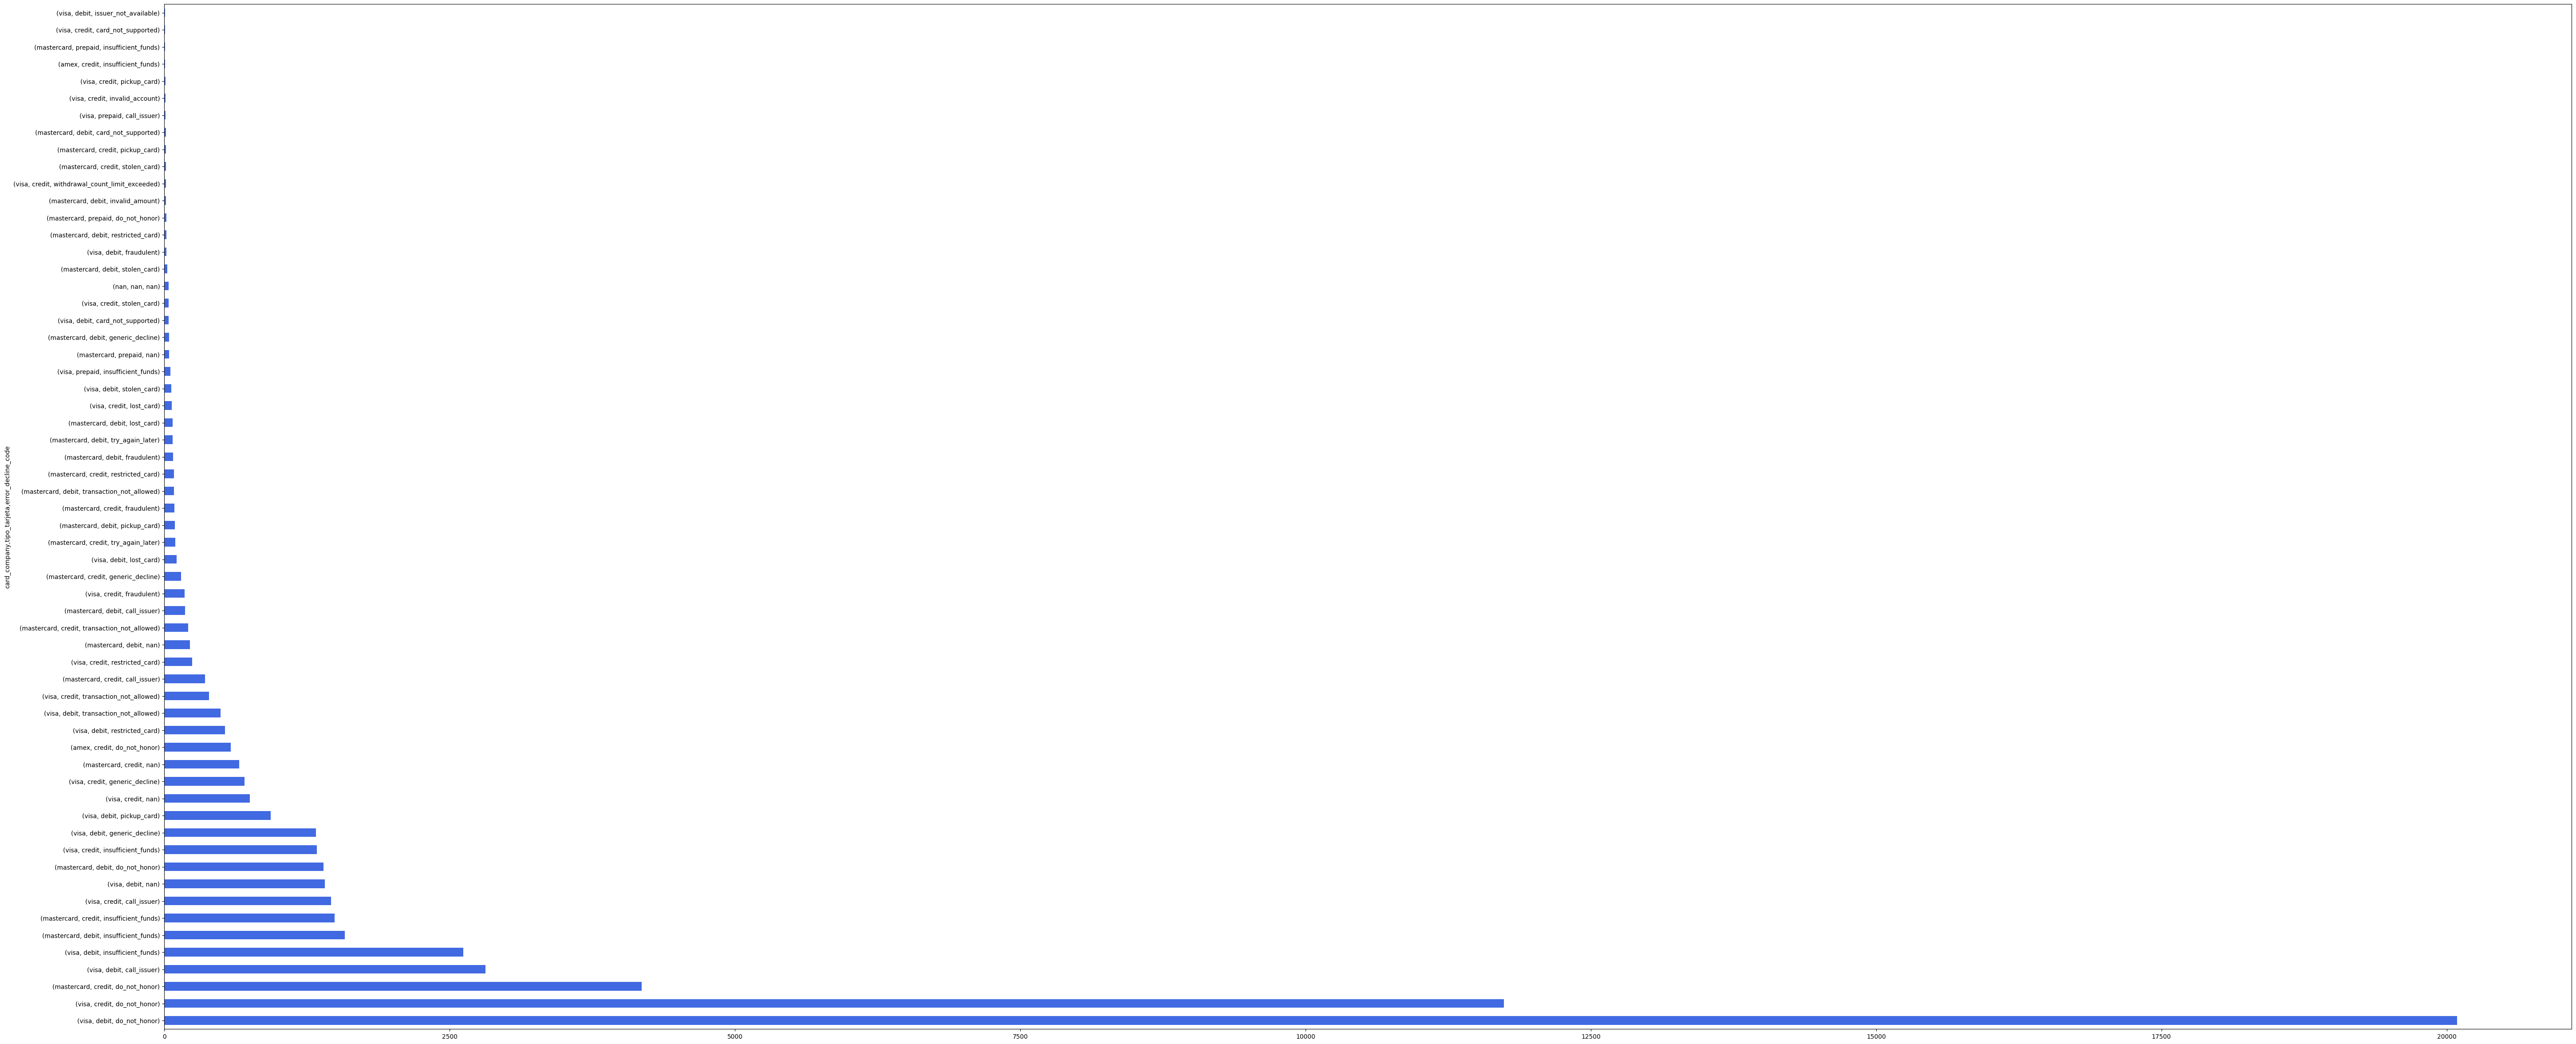

In [44]:
tipo_tarjeta_company_error = df_large[["card_company", "tipo_tarjeta", "error_decline_code"]].value_counts()
df_large[["card_company", "tipo_tarjeta", "error_decline_code"]].value_counts()[:60].plot(kind='barh', color="royalblue")
tipo_tarjeta_company_error.head(60)

card_company  tipo_tarjeta  error_decline_code             
amex          credit        call_issuer                              0.00
                            card_not_supported                       0.00
                            card_velocity_exceeded                   0.00
                            do_not_honor                       2736871.51
                            fraudulent                               0.00
                                                                  ...    
visa          unknown       restricted_card                          0.00
                            stolen_card                              0.00
                            transaction_not_allowed                  0.00
                            try_again_later                          0.00
                            withdrawal_count_limit_exceeded          0.00
Name: current_total_price, Length: 420, dtype: float64

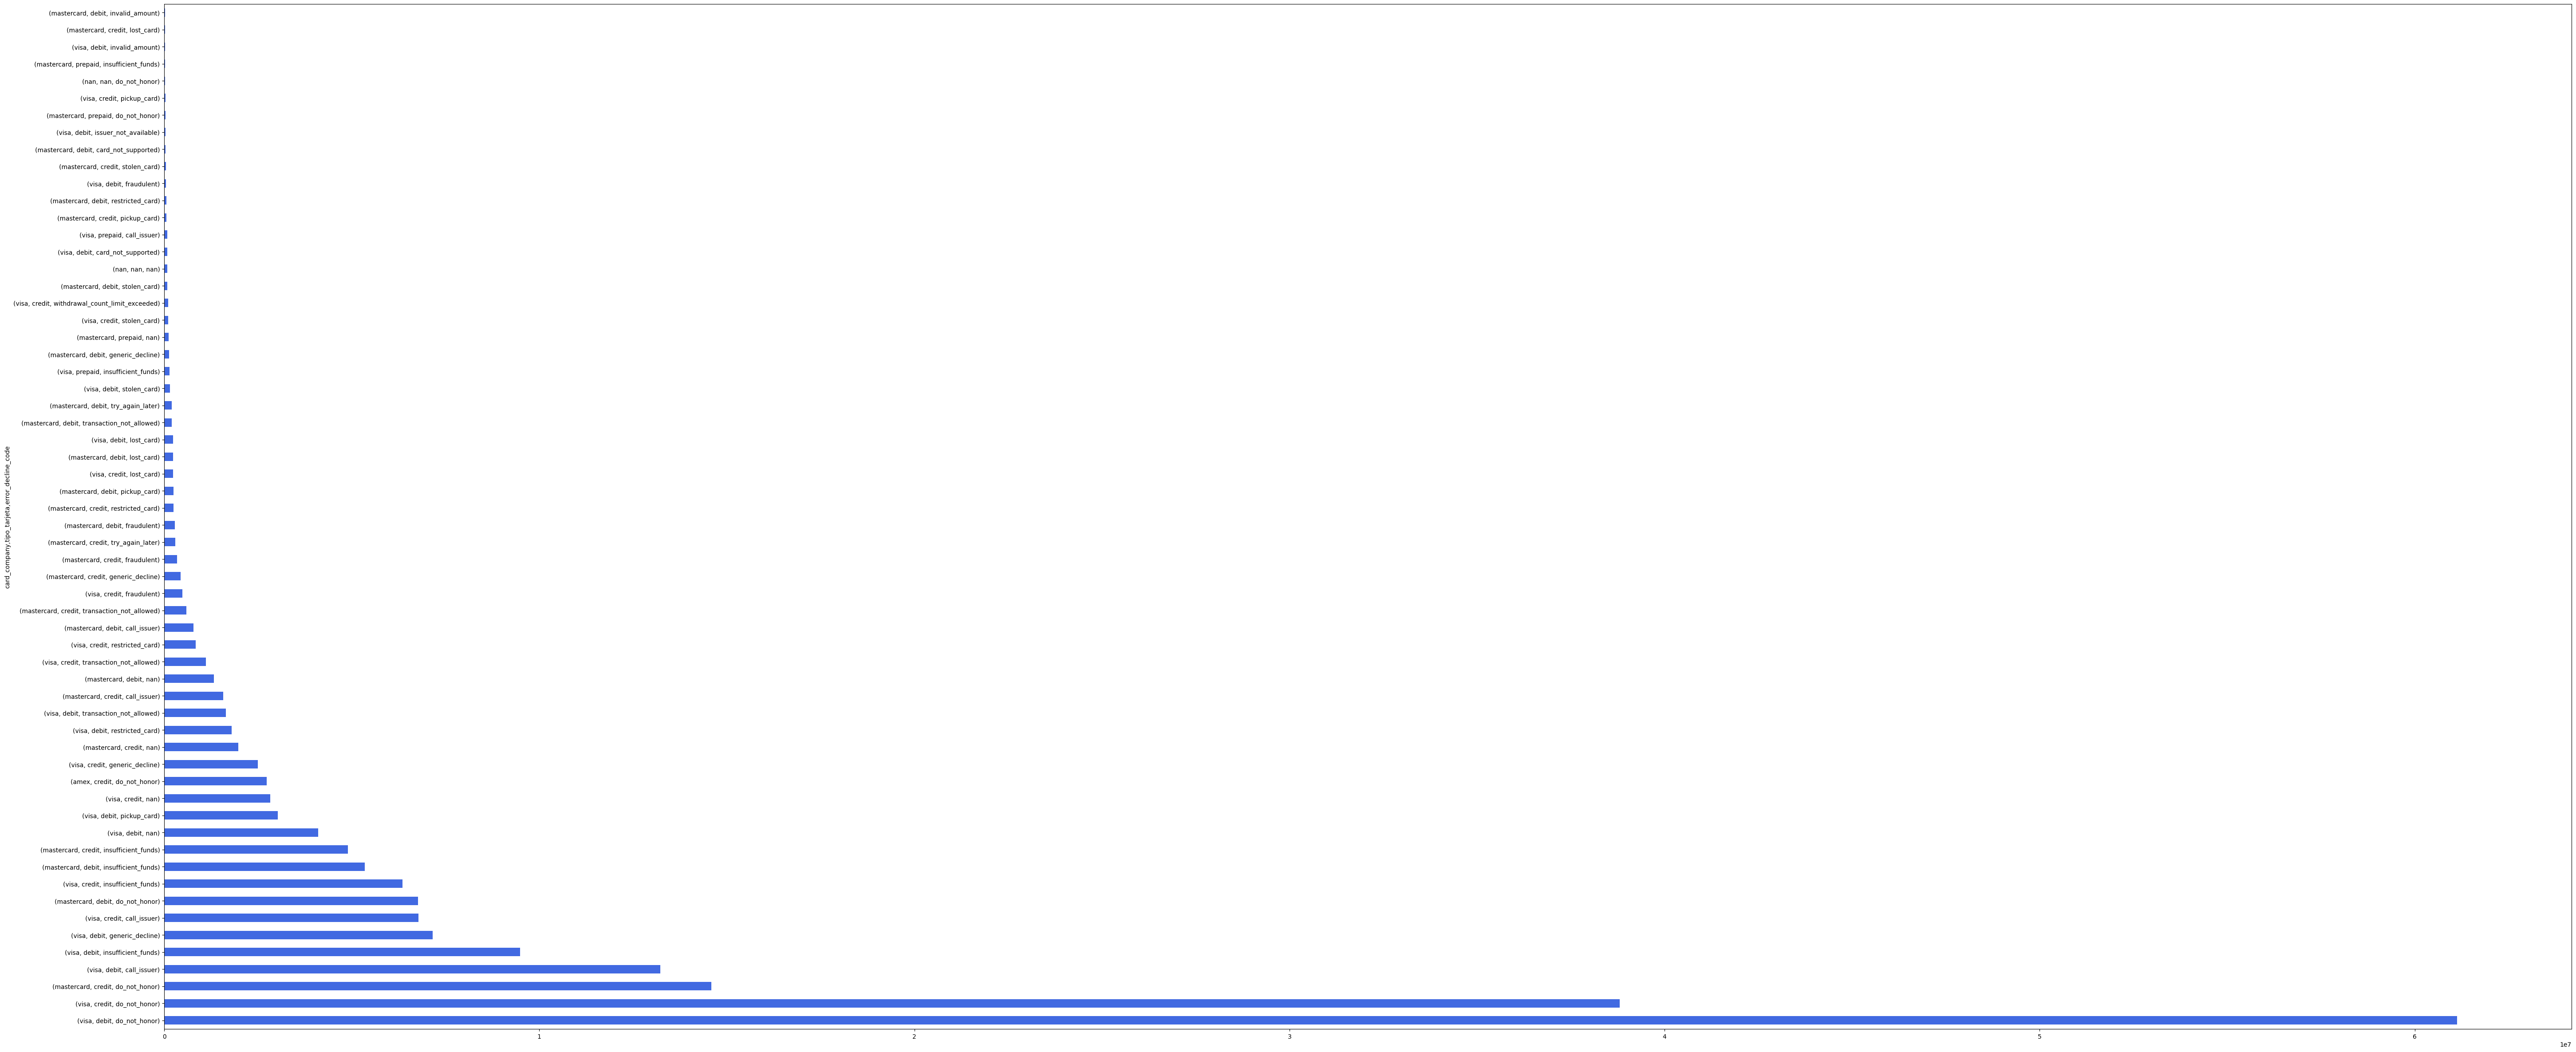

In [45]:
tipo_tarjeta_company_error_sum = df_large.groupby(["card_company", "tipo_tarjeta", "error_decline_code"])["current_total_price"].sum()
df_large.groupby(["card_company", "tipo_tarjeta", "error_decline_code"])["current_total_price"].sum().sort_values(ascending=False)[:60].plot(kind='barh', color="royalblue")
tipo_tarjeta_company_error_sum

In [46]:
tipo_tarjeta_company_error_sum / tipo_tarjeta_company_error

card_company  tipo_tarjeta  error_decline_code             
amex          credit        call_issuer                                NaN
                            card_not_supported                         NaN
                            card_velocity_exceeded                     NaN
                            do_not_honor                       4694.462281
                            fraudulent                                 NaN
                                                                  ...     
visa          unknown       restricted_card                            NaN
                            stolen_card                                NaN
                            transaction_not_allowed                    NaN
                            try_again_later                            NaN
                            withdrawal_count_limit_exceeded            NaN
Length: 420, dtype: float64

## Análisis de dimensión **charge_id**

In [47]:
charge_id = df_large["charge_id"].value_counts()
charge_id.head()

charge_id
nan                            523
ch_3N6Qi7ESwUaeDDLf0wpB5Ira      1
ch_3N6QrBESwUaeDDLf1DuvqMwn      1
ch_3N6R0RESwUaeDDLf02TdMBuJ      1
ch_3N6R1eESwUaeDDLf0onRFIu7      1
Name: count, dtype: int64

In [48]:
charge_id_sum = df_large.groupby(by="charge_id")["current_total_price"].sum()
charge_id_sum

charge_id
ch_3Lty87ESwUaeDDLf1pxEcrdh       1000.00
ch_3LtyCAESwUaeDDLf0Zth3xTK       1000.00
ch_3LtyTwESwUaeDDLf1QHckD3h        992.00
ch_3LtyUOESwUaeDDLf06KPAdsY        992.00
ch_3Ltz4HESwUaeDDLf0GxS9H1h       1300.00
                                  ...    
ch_3Nf0apESwUaeDDLf02Yfysf4       3177.00
ch_3Nf1TkESwUaeDDLf0rWrIZAq      10000.00
ch_3Nf3xnF5JHugNzfe1e06O7Id        399.00
ch_3Nf47BFZhL31auBH18ayRsvj       9000.00
nan                            2148142.37
Name: current_total_price, Length: 59004, dtype: float64

In [49]:
charge_id_sum / charge_id

charge_id
ch_3Lty87ESwUaeDDLf1pxEcrdh     1000.000000
ch_3LtyCAESwUaeDDLf0Zth3xTK     1000.000000
ch_3LtyTwESwUaeDDLf1QHckD3h      992.000000
ch_3LtyUOESwUaeDDLf06KPAdsY      992.000000
ch_3Ltz4HESwUaeDDLf0GxS9H1h     1300.000000
                                   ...     
ch_3Nf0apESwUaeDDLf02Yfysf4     3177.000000
ch_3Nf1TkESwUaeDDLf0rWrIZAq    10000.000000
ch_3Nf3xnF5JHugNzfe1e06O7Id      399.000000
ch_3Nf47BFZhL31auBH18ayRsvj     9000.000000
nan                             4107.346788
Length: 59004, dtype: float64